# Исследование закономерностей определяющих успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


В вашем распорядение данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. И вы планируете кампанию на 2017-й.
**Цель исселедования:**
- планирование кампанию на 2017-й:
    - определить наиболее актуальные платформы,
    - определить наиболее актуальные жанры,
    - игры с каким рейтингом ESRB и в каком регионе рекламировать,
    - важны ли отзывы для продаж.

**Ход исселедования:**
Данными я получу из файла `"/datasets/games.csv"`
Моё исследование пройдет в 6 этапов:
- Обзор данных.
- Предобработка данных.
- Проведение исследовательского анализа данных.
- Составление портрета пользователя каждого региона.
- Проверьте гипотез.
- Написание общего вывода.

Описание данных:

- Name — название игры
- Platform — платформа
- Year_of_Release — год релиза
- Genre — жанр игры
- NA_players — продажи игрокам в Северной Америке (в миллионах долларов)
- EU_players — продажи игрокам в Европе (в миллионах долларов)
- RU_players — продажи игрокам в России (в миллионах долларов)
- Other_players — продажи игрокам в других странах
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг ESRB

В столбце `Rating` представлен рейтинг от организации ESRB:
- Е - Для всех
- М - Для взрослых
- Т - Подросткам
- Е10+ - Для всех от 10 лет и старше
- К-А - Для всех (рейтинг до 1998 года)
- АО - Только для взрослых
- ЕС - Для детей младшего возраста
- RP - Рейтинг ожидается

### Откроем файл с данными и изучим общую информацию. 

#### Импортируем библиотеки необходимые для проведения исследования. Считаем данные из csv-файла в датафрейм и сохраните в переменную data. Выведем первые 5 строчек датафрейма data на экран.

In [1]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/Users/nastasaguseva/Desktop/games.csv') #создаем DataFrame из файла csv, сохраним в переменной data

In [3]:
data.head(5) #выведем первые 5 строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Выведем основную информацию о датафрейме.

In [4]:
data.info() #основная информация о датафрейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов. 

Согласно документации к данным:

- `Name` — название игры. Тип данных — `object`.
- `Platform` — платформа. Тип данных — `object`.
- `Year_of_Release` — год выпуска. Тип данных — `float64`.
- `Genre` — жанр игры. Тип данных — `object`.
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий). Тип данных — `float64`.
- `EU_sales` — продажи в Европе (миллионы проданных копий). Тип данных — `float64`.
- `JP_sales` — продажи в Японии (миллионы проданных копий). Тип данных — `float64`.
- `Other_sales` — продажи в других странах (миллионы проданных копий). Тип данных — `float64`.
- `Critic_Score` — оценка критиков (максимум 100). Тип данных — `float64`.
- `User_Score` — оценка пользователей (максимум 10). Тип данных — `object`.
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию. Тип данных — `object`.

Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

Выведем на экран количество строк-дубликатов в данных.

In [5]:
data.duplicated().sum() #количество строк-дубликатов в данных

0

Явные дубликаты отсутствуют.

### Подготовка данных.

#### Заменим названия столбцов (приведем к нижнему регистру).


In [6]:
data.columns #выводим названия столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [7]:
data.columns = data.columns.str.lower() #приводим названия к нижнему регистру

Проверим результат. Для этого ещё раз выведем на экран названия столбцов:

In [8]:
data.columns #выводим названия столбцов

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Обработаем пропуски и преобразуем данные в нужные типы.

Выведем количество пропущенных значений для каждого столбца.

In [9]:
data.isna().sum() #выводим кол-во пропущенных значений в каждом столбце

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Удалим все строки, где пропущены значения в столбце `name`, `genre`. Удаление 4 строк не повлияют на исследование.

In [10]:
data.dropna(subset=['name', 'genre'], inplace=True) #удаляем все строки, где пропущены значения в столбце name, genre

Другой столбец с пропущенными значениями — `critic_score` — хранит оценку критиков.  Используем на них заглушку в виде отрицательной цифры(-1).

In [11]:
data['critic_score'] = data['critic_score'].fillna(-1) #устанавливаем "заглушки"

Переходим к столбцу `user_score`. Значение 'tbd' мешает заполнить пропуски в этом столбце. 

In [12]:
data[data['user_score'] == 'tbd']['user_score'].groupby(data['year_of_release']).count()

year_of_release
1997.0      1
1999.0      8
2000.0     43
2001.0     82
2002.0    192
2003.0     95
2004.0    107
2005.0    121
2006.0    124
2007.0    192
2008.0    326
2009.0    405
2010.0    331
2011.0    217
2012.0     24
2013.0     15
2014.0     21
2015.0     38
2016.0     34
Name: user_score, dtype: int64

Это что-то неочевидное и связано с обновлением базы — есть 'tbd'почти во всех годах выпуска, заполним np.nan

In [13]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan #заменяем tbt на NaN

In [14]:
data['user_score'].unique() #выведем уникальные значения user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Изменить тип данных в столбце `user_score` — float (тип с плавающей запятой).

In [15]:
data.user_score = data.user_score.astype(float)

Переходим к заполнению пропусков. По аналогии с `critic_score` используем на них заглушку в виде отрицательной цифры(-1).

In [16]:
data['user_score'] = data['user_score'].fillna(-1) #устанавливаем "заглушки"

Переходим к столбцу `rating`.

Выведем уникальные значения столбца `rating`.

In [17]:
data.rating.unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заполним NaN в столбце `rating` заглушкой со значением 'no rating'. Рейтинг ESRB используется в США и Канаде, а в наших данных присутствуют и другие страны, соответственно пропуски никак не связаны с ошибкой заполнения данных.

In [18]:
data.rating = data.rating.fillna('no rating') #устанавливаем "заглушки"

Удалим строки, где пропущены значения в столбце `year_of_release`. Удаление 269 строк не повлияют на исследование.

In [19]:
data[data.year_of_release.isnull()] #удаляем все строки, где пропущены значения в столбце year_of_release

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,-1.0,-1.0,no rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,-1.0,-1.0,no rating
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,-1.0,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,-1.0,-1.0,no rating


In [20]:
data.dropna(subset=['year_of_release'], inplace=True)

Изменить тип данных в столбце `year_of_release` на — int (целочисленный тип).

In [21]:
data.year_of_release = data.year_of_release.astype(int)

Выведем уникальные значения столбца `year_of_release`.

In [22]:
data.year_of_release.unique()

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Повторно выведем основную информацию о датафрейме, чтобы убедится что типы данных в столбцах изменены, пропуски заполнены.

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


NaN отсутствуют. Типы данных изменены.

Критичный уровень потерь записей на этапе предобработки составляет 10%, оптимальный 5%. Рассчитаем уровень потерь данных.

In [24]:
100 - 16444 / 16714 * 100

1.6154122292688697

Уровень потерь данных < 2%.

#### Рассчитаем суммарные продажи для каждой игры во всех регионах и запишем их в отдельный столбец `total_sales`.

In [25]:
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [26]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no rating,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,no rating,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,no rating,28.31


В наших данных пропуски встречались в столбцах:
- `name`, `genre`, `year_of_release` - можно предположить, что в этих двух столбцах отстутствует данные из-за ошибки при выгрузке данных,
- `genre` - разработчики не проставили жанр у игры,
- `critic_score`, `user_score` - не все игры были оценены критиками/пользователями,
- `rating` - рейтинг ESRB предназначен для маркировки игр в США и Канады, пропуск может означать, что игра выпущена не в Северо-Американском регионе.

### Проведем исследовательский анализ данных.

#### Изучем зависимость кол-ва игр выпущенных в разные годы. 

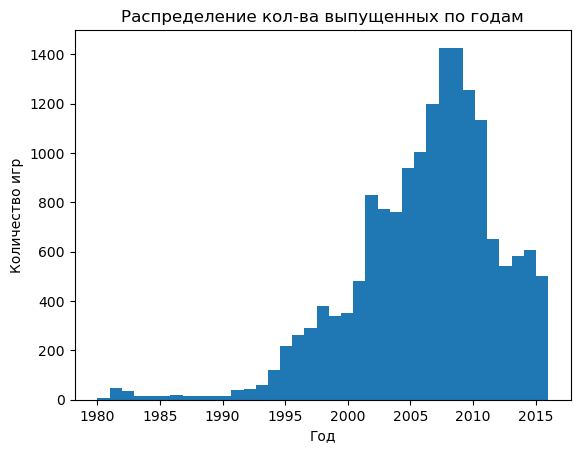

In [27]:
#создаем гистограмму
plt.hist(data['year_of_release'], 
         bins = 37,   #количество столбцов на гистограмме
         range = (1980, 2016)) #диапазон значений оси x

plt.title('Распределение кол-ва выпущенных по годам') #добавляем заголовок графика
plt.xlabel('Год') #добавляем подпись для оси x
plt.ylabel('Количество игр')#добавляем подпись для оси y
plt.show() #показываем график

In [28]:
data.year_of_release.value_counts().to_frame()

,year_of_release
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775
2004,762


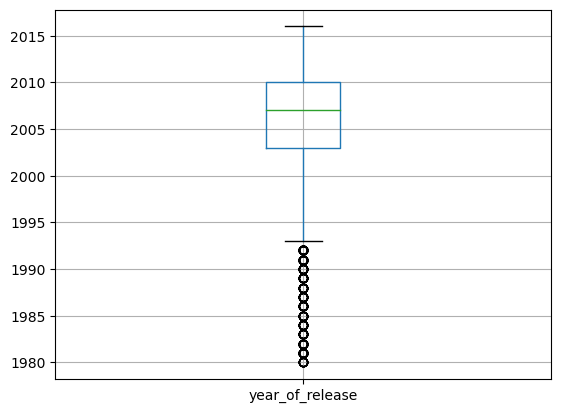

In [29]:
data.boxplot(column=['year_of_release']); #строим boxplot

**Вывод**
- Компьютерные игры появились в 80-х, но из-за того, что технологии были недостаточно развиты, наблюдается плато. 
- С 95-ого года технолгии стали резко развиваться, как видно на графике, кол-во релизов в год резко увеличивается.
- С 2010 года наблюдается спад, скорее всего это связано с перенасыщением рынка, а также переходом многих пользователей и разработчиков на мобильные платформы.
- Пик приходится на 2008 год.
- Исследуем «ящик с усами». Нижний «ус» упирается примерно в 1993 г. Верхний заканчивается на 2016 г. Это ориентировочная граница нормального размаха. Всё, что лежит за ней, считается выбросом. Можно сделеть вывод, что для исследования будет достаточно взять период с 1993 по 20016 г.

In [30]:
data = data.loc[(data['year_of_release'] >= 1993)] #фильтруем данные

#### Посмотрим как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам. 

In [31]:
#расчитаем суммарные продажи по каждой платформе по годам
count_games_1 = data.groupby(['platform', 'year_of_release'])['total_sales'].sum() 
count_games_1

platform  year_of_release
3DO       1994                0.02
          1995                0.08
3DS       2011               63.20
          2012               51.36
          2013               56.57
                             ...  
XB        2008                0.18
XOne      2013               18.96
          2014               54.07
          2015               60.14
          2016               26.15
Name: total_sales, Length: 202, dtype: float64

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       252.66
XB       251.57
N64      218.01
GC       196.73
XOne     159.32
GB       152.08
SNES     124.69
WiiU      82.19
PSV       53.81
SAT       33.59
DC        15.95
GEN        8.78
NES        3.72
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64


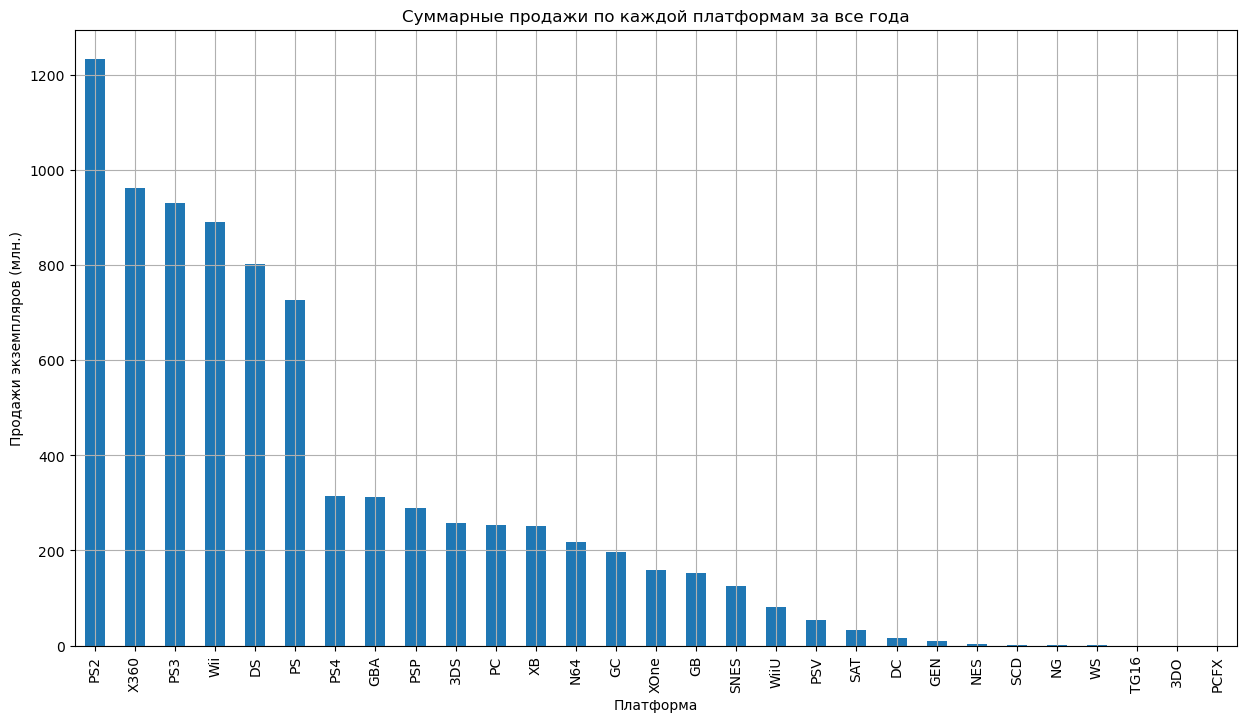

In [33]:
#расчитаем суммарные продажи экземпляров по каждой платформам за все года
count_games_2 = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(count_games_2)
#создаем гистограмму
count_games_2.plot(x = 'platform', 
              y = 'total_sales', 
              kind = 'bar', 
              figsize=(15,8), 
              grid=True, 
              title = 'Суммарные продажи по каждой платформам за все года')

plt.xlabel('Платформа')
plt.ylabel('Продажи экземпляров (млн.)')

plt.show()

Платформы с наибольшими суммарными продажами за весь период: 
- "PS2", 
- "X360", 
-    "PS3", 
-    "Wii", 
-    "DS", 
-    "PS".

year_of_release
2008    671.50
2009    658.82
2007    604.75
2010    590.13
2006    517.71
2011    507.58
2005    457.82
2004    418.68
2002    394.97
2013    361.24
2003    357.54
2012    355.84
2014    331.53
2001    331.46
2015    267.98
1998    256.31
1999    251.11
2000    201.66
1997    201.07
1996    199.15
2016    129.94
1995     88.12
1994     79.23
1993     45.99
Name: total_sales, dtype: float64


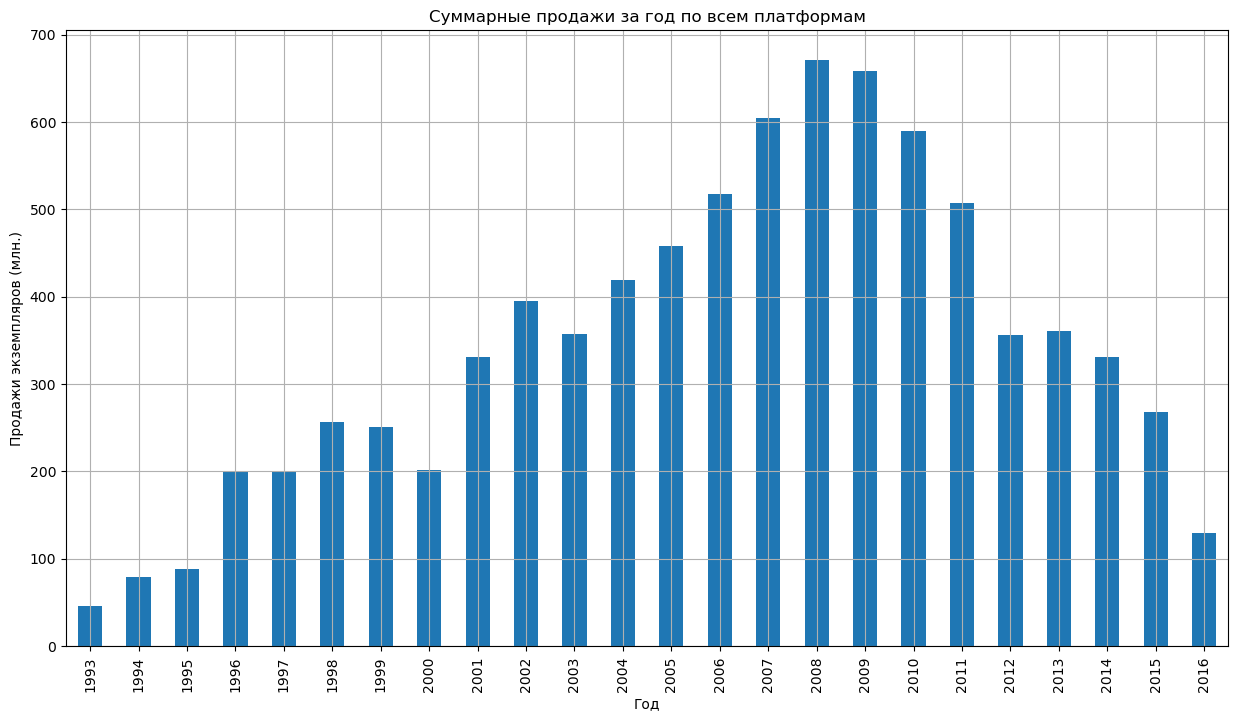

In [34]:
#расчитаем суммарные продажи экземпляров каждый год по всем платформам.
count_games_3 = data.groupby(['year_of_release'])['total_sales'].sum()
print(count_games_3.sort_values(ascending=False))
#создаем гистограмму
count_games_3.plot(x = 'year_of_release', 
              y = 'total_sales', 
              kind = 'bar', 
              figsize=(15,8), 
              grid=True, 
              title = 'Суммарные продажи за год по всем платформам')

plt.xlabel('Год')
plt.ylabel('Продажи экземпляров (млн.)')

plt.show()

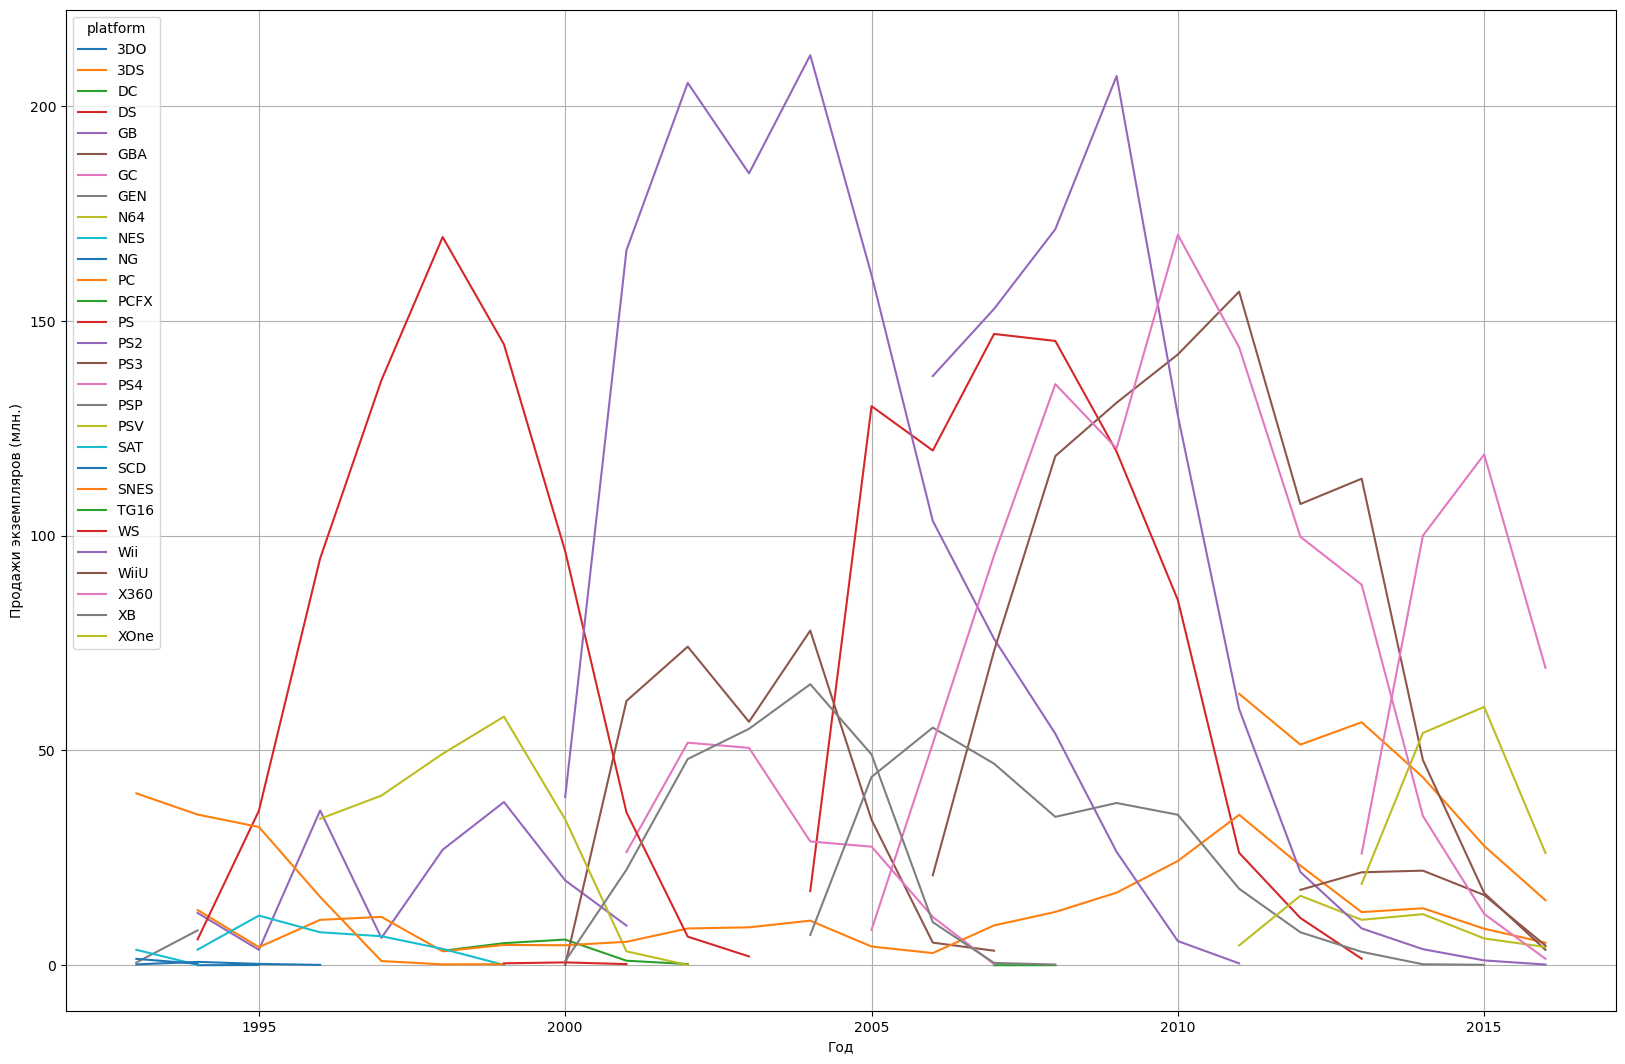

In [35]:
#строим распределение суммарных продажи экземпляров по годам для каждой платформы.
data.pivot_table(index='year_of_release', 
                      columns = 'platform', 
                      values='total_sales', 
                      aggfunc='sum').plot(grid=True, figsize=(20, 13))
plt.xlabel('Год')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Для дальнейшего исследования берем период с 2014 по 2016 года, так как платформы актуальные для более раннего периода к 2014-2016г. почти перестали продаваться.



In [36]:
data_sort = data.query("year_of_release >= 2014")

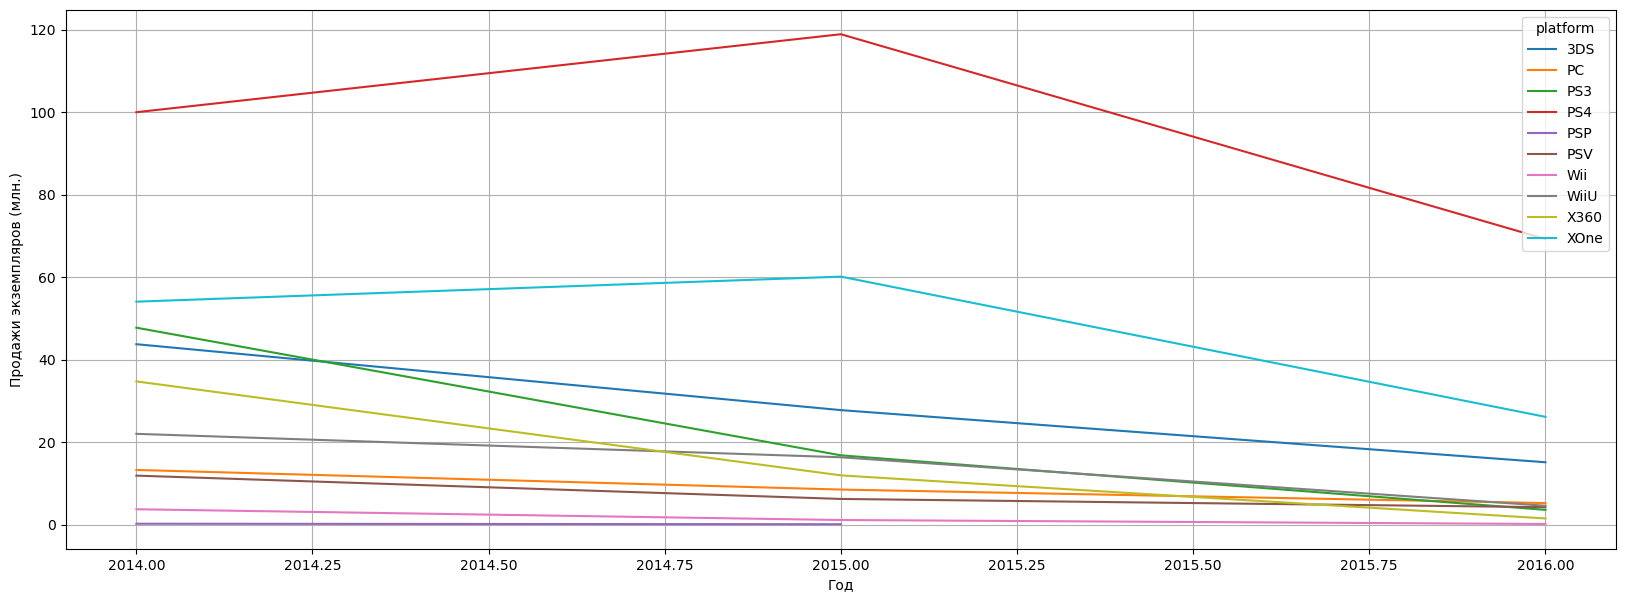

In [38]:
#строим распределение суммарных продажи экземпляров по годам для каждой платформы с 2014 
data_sort.pivot_table(index='year_of_release', 
                      columns = 'platform', 
                      values='total_sales', 
                      aggfunc='sum').plot(grid=True, figsize=(20, 7))
plt.xlabel('Год')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Вывод**
- Наибольшие суммарные продажи за весь период: "PS2", "X360", "PS3", "Wii", "DS", "PS".
- На графике выше мы видим, что  продажи почти всех платформ, кроме XOne, PS4, 3DS к 2016 году практически приравниваются к 0.
- Новые модели появлялись с регулярностью в 1 год, если не считать две последние платформ, которые появились одновременно.
- Старые модели исчезают постепенно, относительно появления новых.

#### Возьмем данные за соответствующий актуальный период, эти данные помогут построить прогноз на 2017 год.

Считаю, что актуальный период для дальнейшего исследование - 2014 - 2016 г., так как платформы актуальные для более раннего периода к 2014 - 2016г. почти перестали продаваться, соответствено их можно не учитывать в прогнозе на 2017 г.

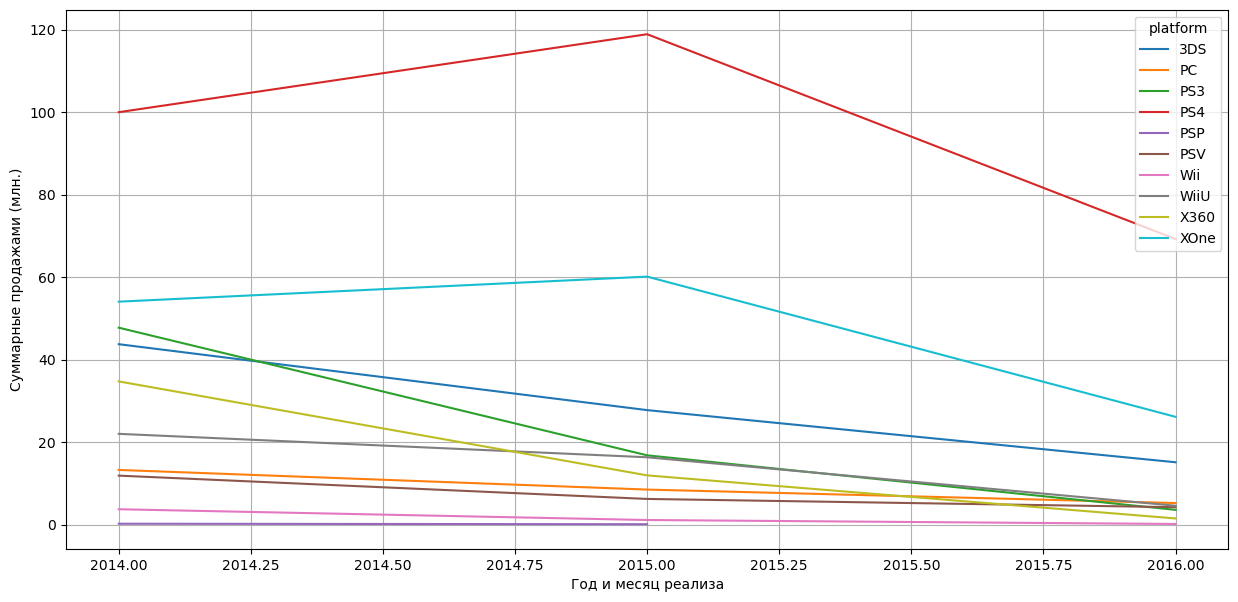

In [39]:
#строим распределение суммарных продажи по годам для каждой платформы с 2014 
data_sort.pivot_table(index='year_of_release', 
                      columns = 'platform', 
                      values='total_sales', 
                      aggfunc='sum').plot(grid=True, figsize=(15, 7))

plt.xlabel('Год и месяц реализа')
plt.ylabel('Суммарные продажами (млн.)')
plt.show()

У XOne сумма продаж значительно ниже, PS4 лидирует по продажам. Однако, продажи обеих платформ падают. Но все равно можно считать эти платформы потенциально прибильными.

#### Построем  «ящик с усами» по глобальным продажам игр в разбивке по платформам.

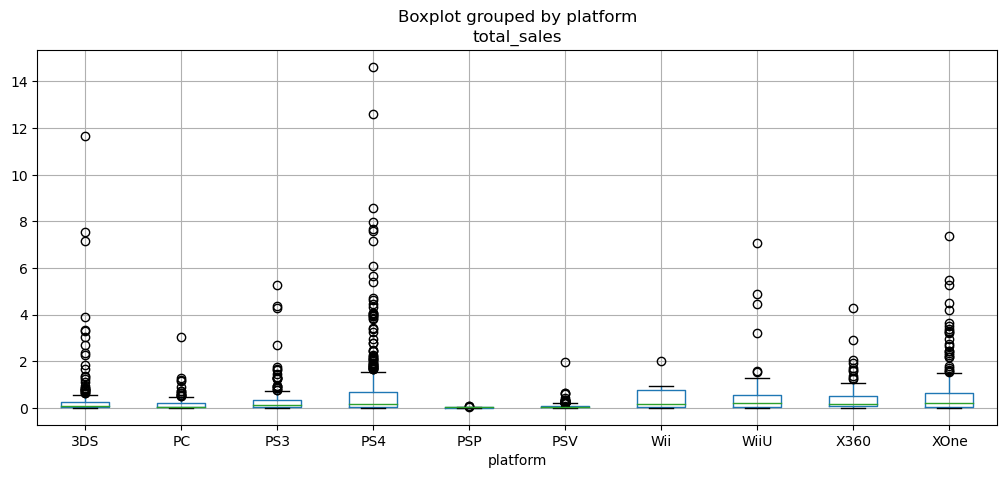

In [40]:
#строим boxplot
data_sort.boxplot(column='total_sales', by='platform', figsize=(12,5))
plt.show();

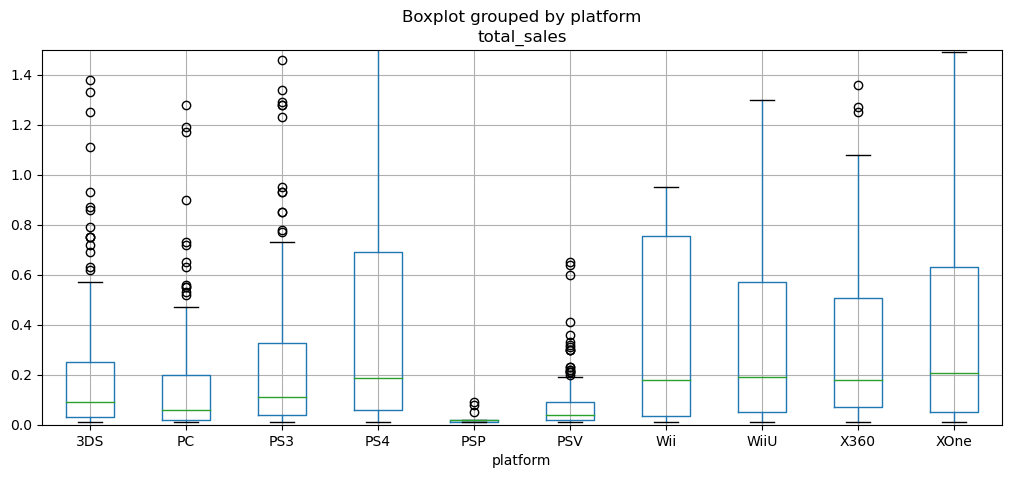

In [41]:
data_sort.boxplot(column='total_sales', by='platform', figsize=(12,5))
plt.ylim(0, 1.5)
plt.show();

In [42]:
data_sort.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


**Вывод**
- Присутствует много выбросов, лежащих выше верхнего уса, однако считаю что их необходимо оставить, т.к. есть игры, которые могли иметь большие продажи.
- Максимально значение кол-ва проданных копий у PS4.
- Кол-во продаж (count) у PS4 значительно выше, чем у остальных.
- Mедиана, или второй квартиль, у всех платформ не превышает 0.205. 
- Самая высокая мелиана у XOne.
- Интерквартильный размах шире всех у Wii.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


Для проведения исследования возьмем платформу PS4, так как она имеет значительно большее количество наблюдений в наборе данных, а также значительные продажи.

Построем диаграмму рассеяния и посчитайте корреляцию между отзывами пользователей и продажами.

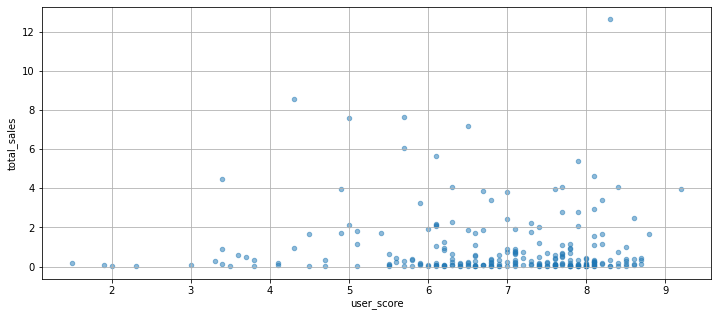

In [47]:
#строим диаграмму рассеяния 
(data_sort
 .query('platform == "PS4" & user_score != -1')
 .plot(x='user_score',
       y='total_sales',
       kind='scatter',
       alpha=0.5,
       figsize=(12,5),
       grid=True))
plt.show()

In [43]:
#посчитаем корреляцию между отзывами пользователей и продажами
data_ps4 = data_sort.query('platform == "PS4" & user_score != -1')
data_ps4['total_sales'].corr(data_ps4['user_score'])

-0.040131589472697335

- Коэффициент корреляции Пирсона — отрицательный. 
- Корреляция в 0.04 говорит об отсутствии связи. 

Построем диаграмму рассеяния и посчитайте корреляцию между оценками критиков и продажами.

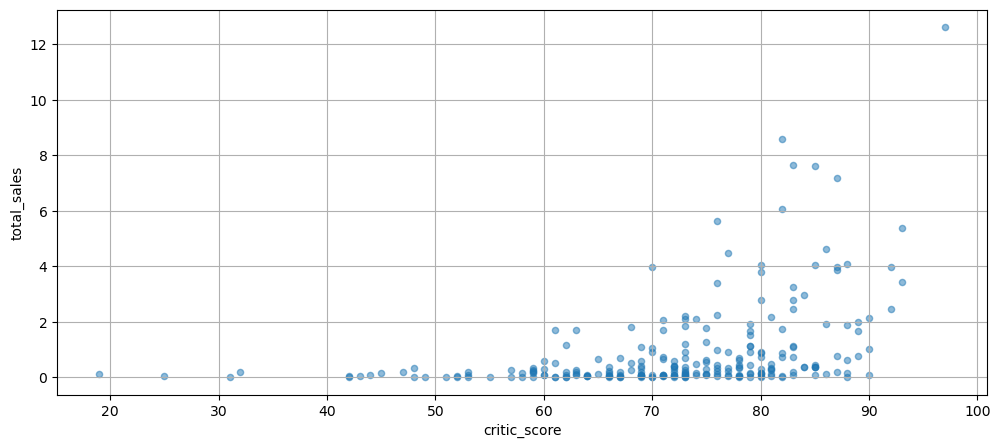

In [44]:
#строим диаграмму рассеяния 
(data_sort
 .query('platform == "PS4" & critic_score != -1')
 .plot(x='critic_score',
       y='total_sales',
       kind='scatter',
       alpha=0.5,
       figsize=(12,5),
       grid=True))
plt.show()

In [45]:
#посчитаем корреляцию между оценками критиков и продажами
data_ps4.query('platform == "PS4" & critic_score != -1')
data_ps4['total_sales'].corr(data_ps4['critic_score'])

0.33982751788998067

- Коэффициент корреляции Пирсона — положительный.
- Корреляция в 0.34 говорит о очень слабой связи или ее отсутствии. 

**Вывод**

- Рассчитав коэффициент корреляции Пирсона между оценками критиков/пользователей и продажами, можно сказать, что зависимости между ними - нет, либо она не очевидная.
- Большинство игр получили высокие оценки как у пользователей, так и у критиков.

#### Соотнесем выводы с продажами игр на других платформах.

Для исследования возьмем ТОП-5 платфор по медианным продажам.

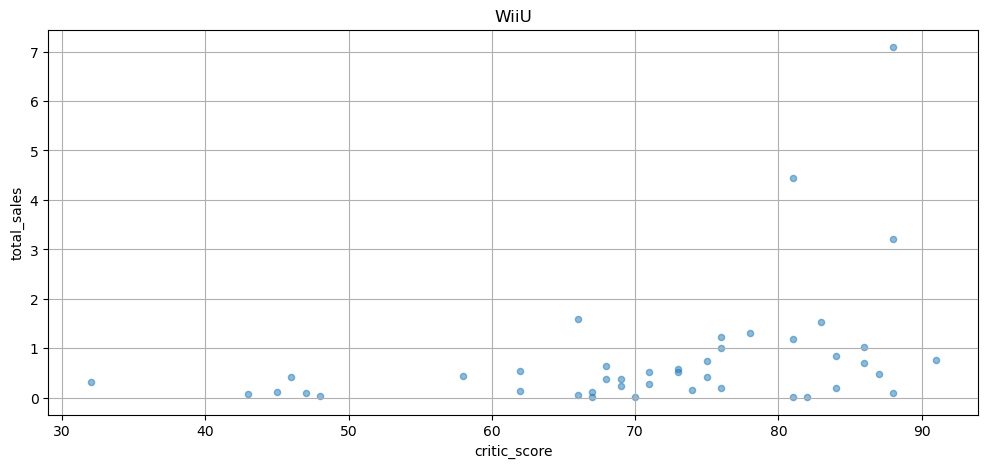

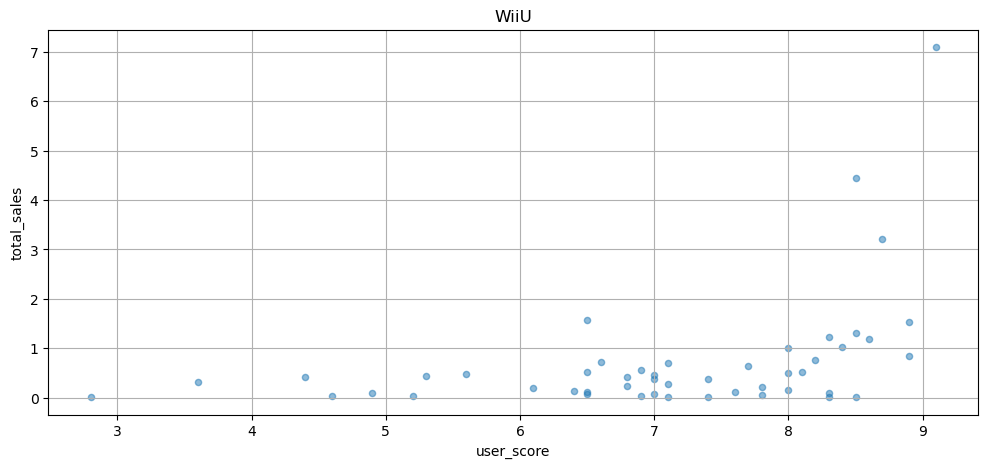

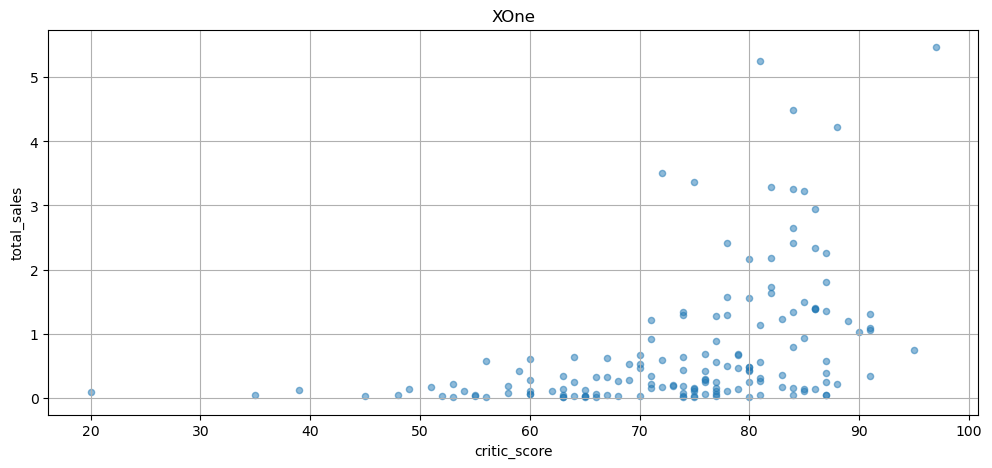

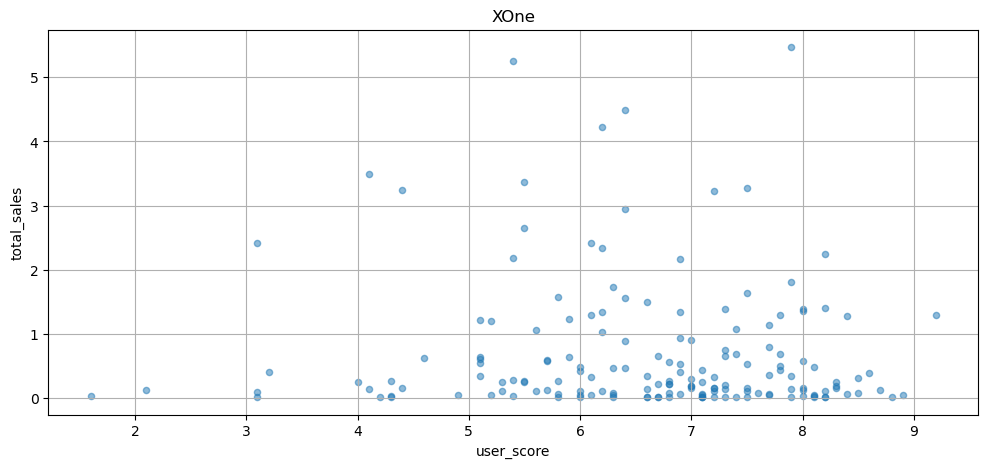

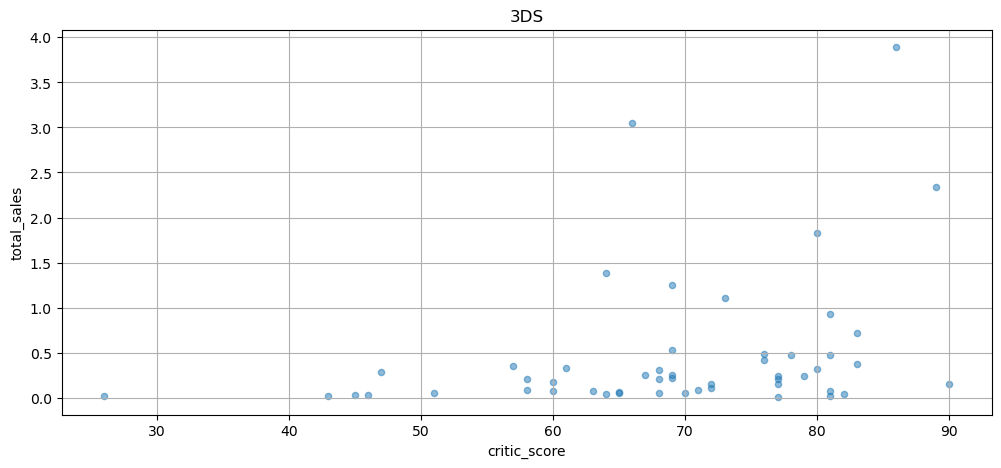

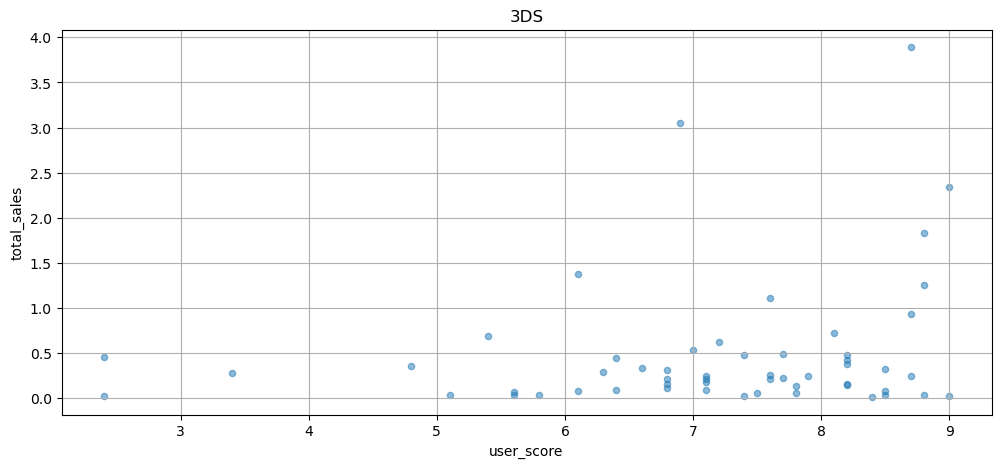

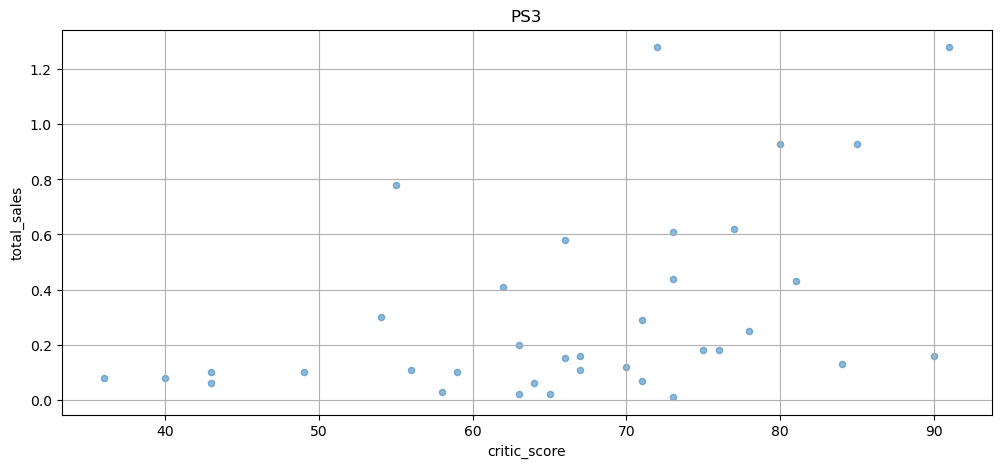

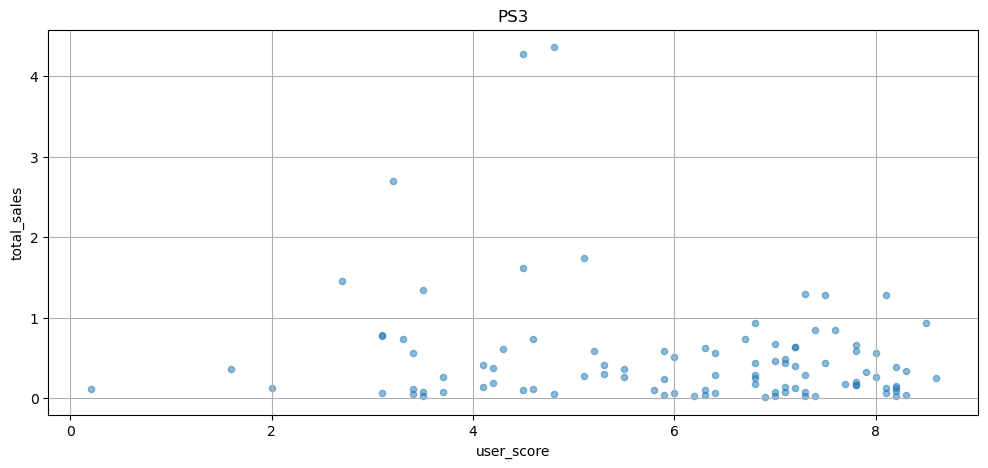

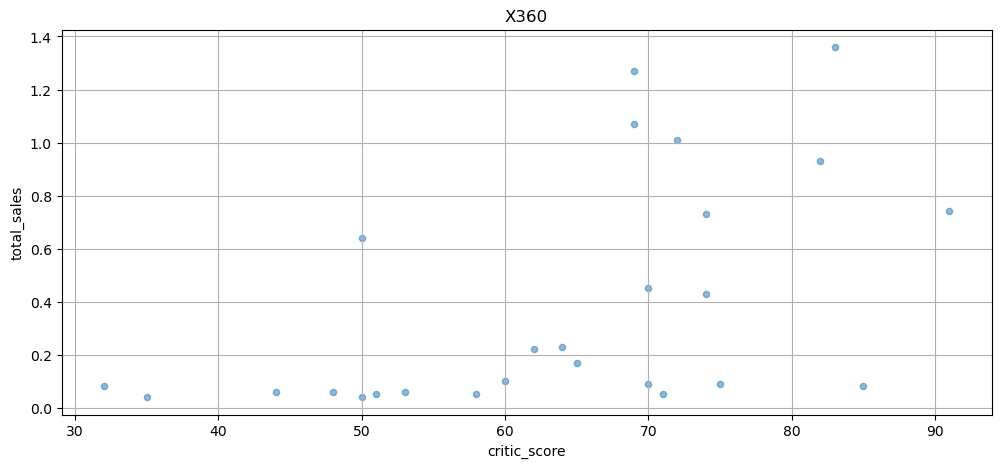

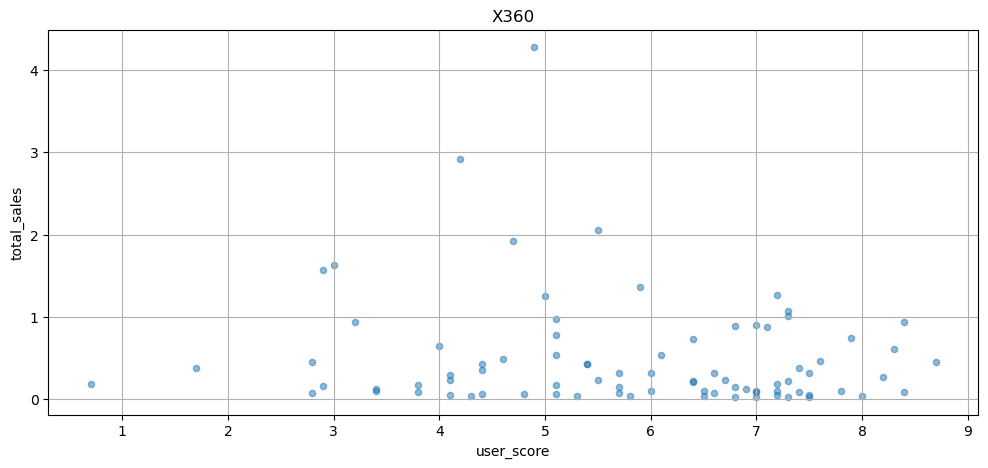

In [47]:
#создаем выгрузки без "заглушек"
data_without_PS4 = data_sort.query('platform != "PS4"')
data_without_user_score = data_without_PS4.query('user_score != -1')
data_without_critic_score = data_sort.query('critic_score != -1')

b = (data_without_PS4
     .query('user_score != -1 & critic_score != -1')
     .groupby('platform')['total_sales']
     .median())

top_five_platform = b.sort_values(ascending = False).head(5)

#строим диаграмму рассеяния для ТОП-5 платфор по медианным продажам

for p in top_five_platform.index:
    (data_without_critic_score[data_without_critic_score['platform']==p]
     .plot(x='critic_score', 
           y='total_sales',
           kind='scatter',
           alpha=0.5,
           figsize=(12,5),
           grid=True,
           title = p))
    plt.show()
    (data_without_user_score[data_without_user_score['platform']==p]
     .plot(x='user_score',
           y='total_sales',
           kind='scatter',
           alpha=0.5,
           figsize=(12,5),
           grid=True,
           title = p))
    plt.show()

In [48]:
#посчитаем корреляцию между оценками критиков/пользователей и продажами для ТОП-5 платфор

for p in top_five_platform.index:
    a = data_without_user_score[data_without_user_score['platform']==p]
    b = data_without_critic_score[data_without_critic_score['platform']==p]

    print(p, 'корреляция отзывы пользователей - продажи',
          a['total_sales'].corr(a['user_score']))
    
    print(p, 'корреляция отзывы критиков - продажи',
          b['total_sales'].corr(b['critic_score']), '\n')



WiiU корреляция отзывы пользователей - продажи 0.40792645792170784
WiiU корреляция отзывы критиков - продажи 0.37020141248088395 

XOne корреляция отзывы пользователей - продажи -0.07038392806475818
XOne корреляция отзывы критиков - продажи 0.4286769437033319 

3DS корреляция отзывы пользователей - продажи 0.21519327185270287
3DS корреляция отзывы критиков - продажи 0.31411749286905094 

PS3 корреляция отзывы пользователей - продажи -0.16676141347662107
PS3 корреляция отзывы критиков - продажи 0.4465746049319071 

X360 корреляция отзывы пользователей - продажи -0.13844457094566504
X360 корреляция отзывы критиков - продажи 0.5257228356581521 



**Вывод**
- Для исследования взяли ТОП-5 платфор по медианным продажам: 
    - WiiU
    - PSV
    - 3DS
    - PC
    - XOne.
- Построев диаграммы рассеивания и рассчитав коэффициент корреляции Пирсона между оценками критиков/пользователей и продажами, можно сказать, что зависимости между ними - нет, либо она очень слабая или слабая.

#### Посмотройте общее распределение игр по жанрам. 

In [49]:
data_sort.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


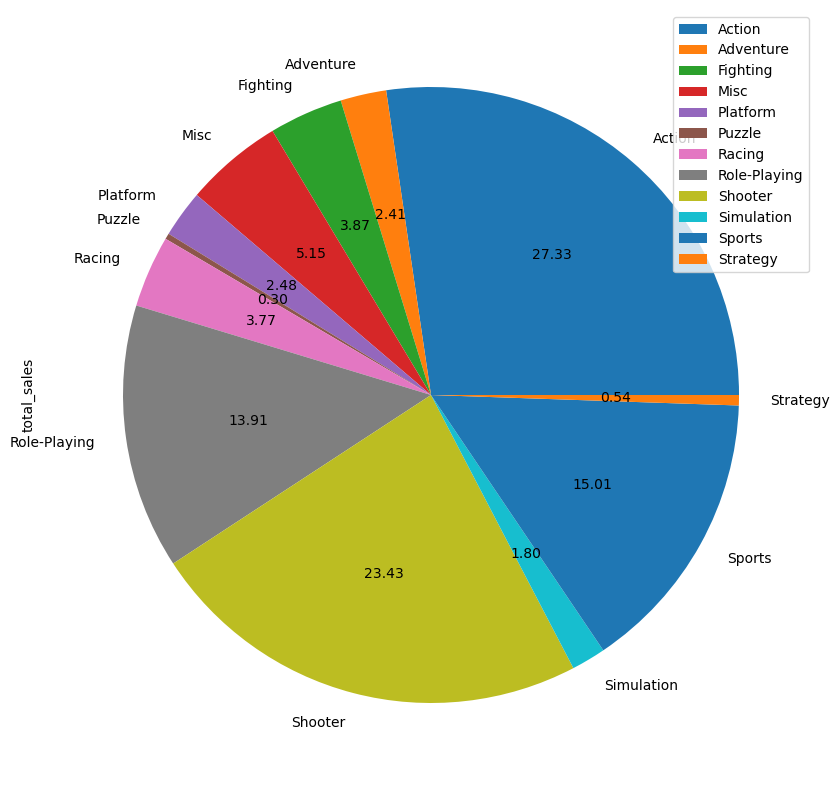

In [51]:
#построим круговую диаграмму распределение игр по жанрам
(data_sort.groupby(['genre'])
          .sum()
 .plot(kind='pie', 
       y='total_sales', 
       figsize=(10, 10), 
       autopct='%.2f'));

In [56]:
data_sort.groupby(['genre'])['total_sales'].sum().sort_values(ascending=False)

genre
Action          199.36
Shooter         170.94
Sports          109.48
Role-Playing    101.44
Misc             37.55
Fighting         28.22
Racing           27.52
Platform         18.09
Adventure        17.55
Simulation       13.13
Strategy          3.96
Puzzle            2.21
Name: total_sales, dtype: float64

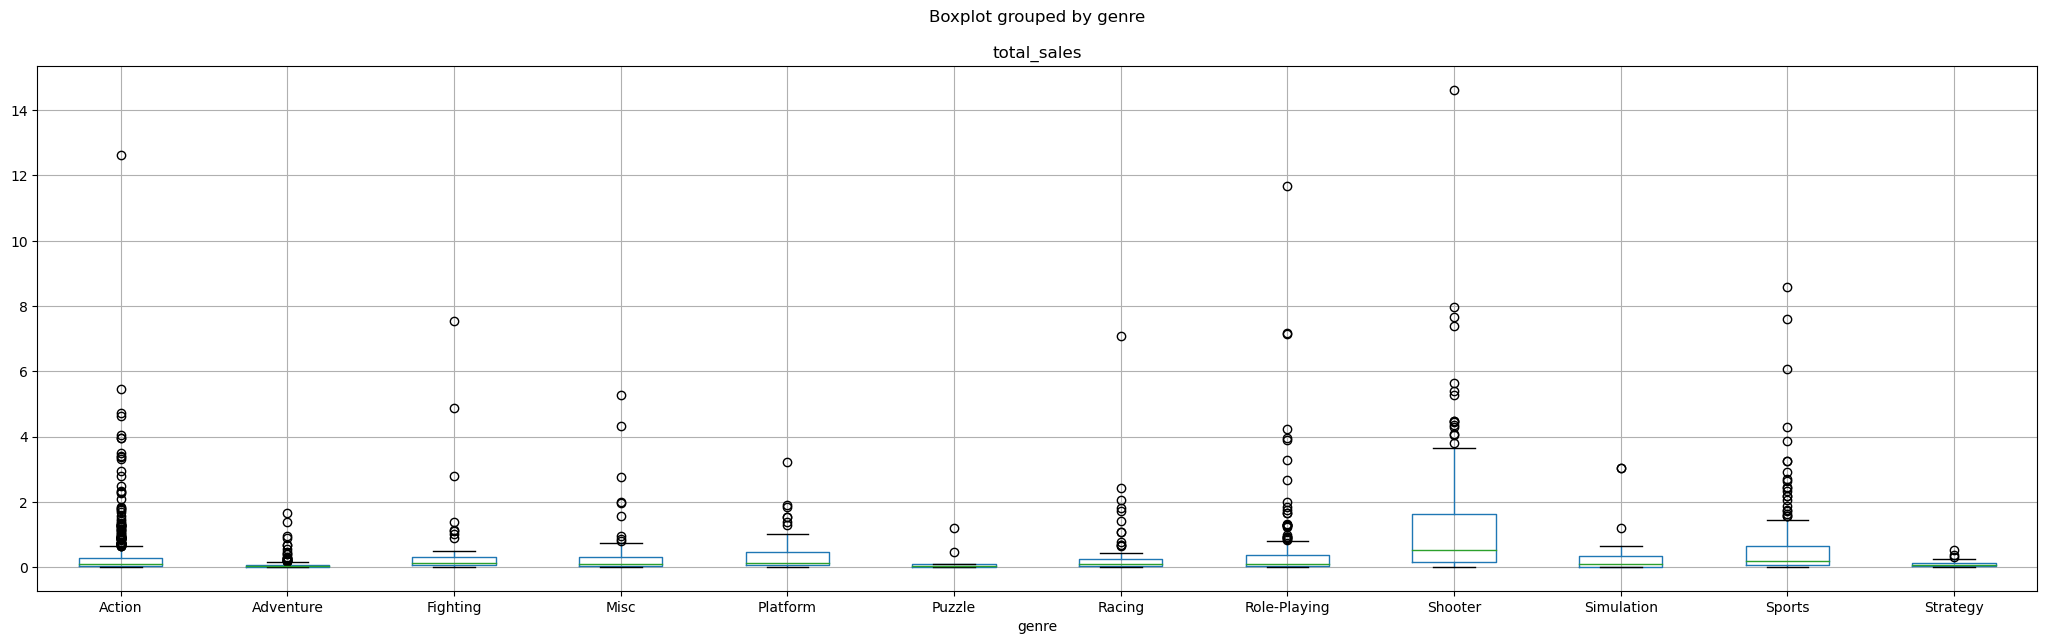

In [52]:
#построим boxplot игр по жанрам
data_sort.boxplot(column='total_sales', 
             by='genre', 
             figsize=(25,7))
plt.show();

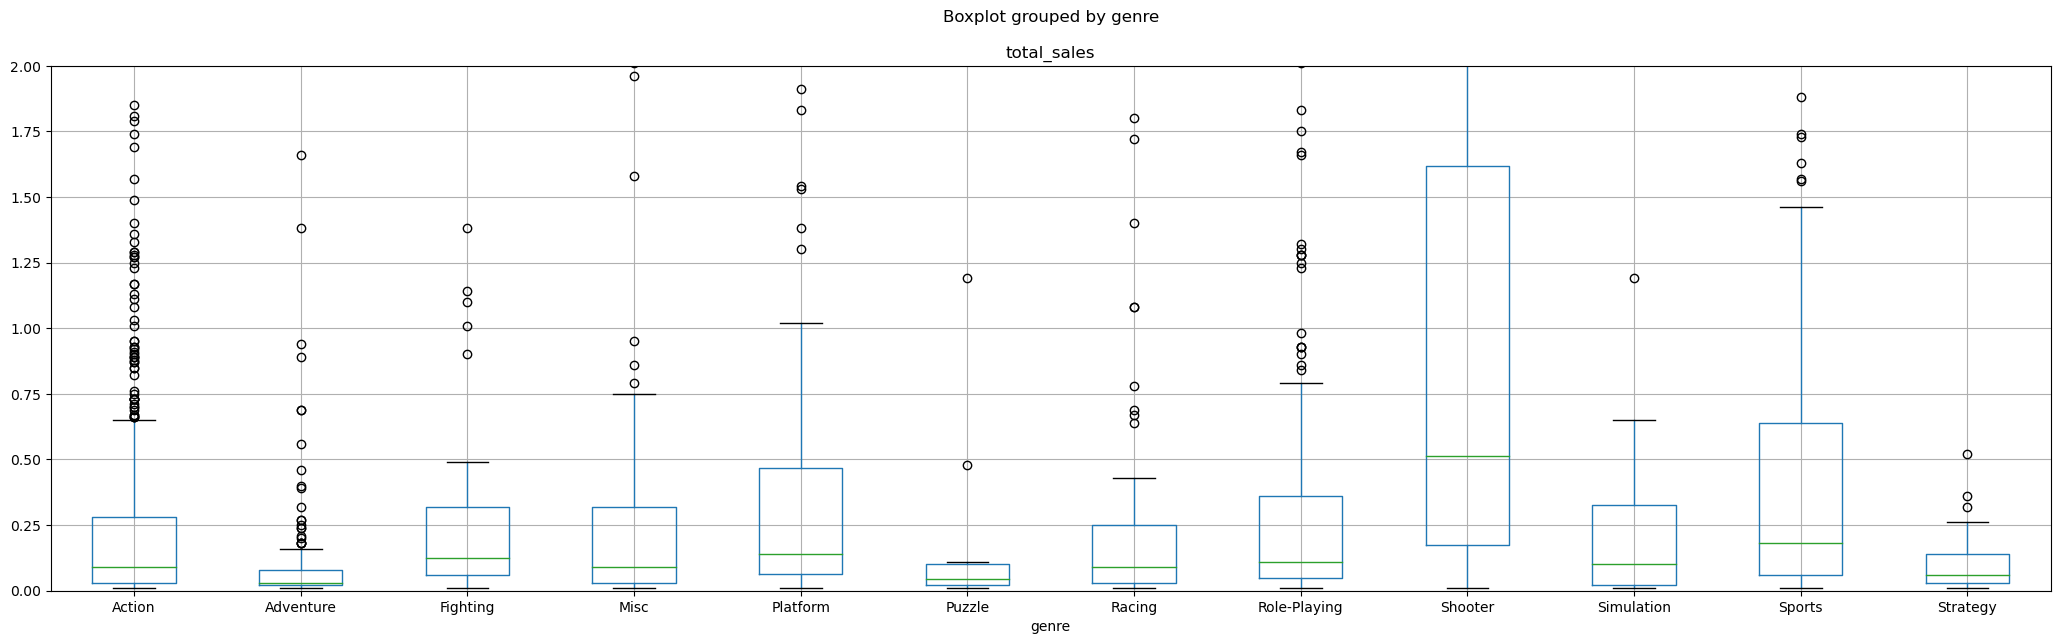

In [53]:
data_sort.boxplot(column='total_sales', 
             by='genre', 
             figsize=(25,7))
plt.ylim(0,2)
plt.show();

In [54]:
data_sort.groupby('genre')['total_sales'].median().sort_values(ascending = False)

genre
Shooter         0.515
Sports          0.180
Platform        0.140
Fighting        0.125
Role-Playing    0.110
Simulation      0.100
Action          0.090
Misc            0.090
Racing          0.090
Strategy        0.060
Puzzle          0.045
Adventure       0.030
Name: total_sales, dtype: float64

**Вывод**
- Shooter жанр с самой высой медианной продаж, соответственно он будет самым прибыльным

### Составим портрет пользователя каждого региона.

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы.
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе.

#### Изучим популярность платформ в разных регионах.

Начнем с пользователей в Северной Америке.

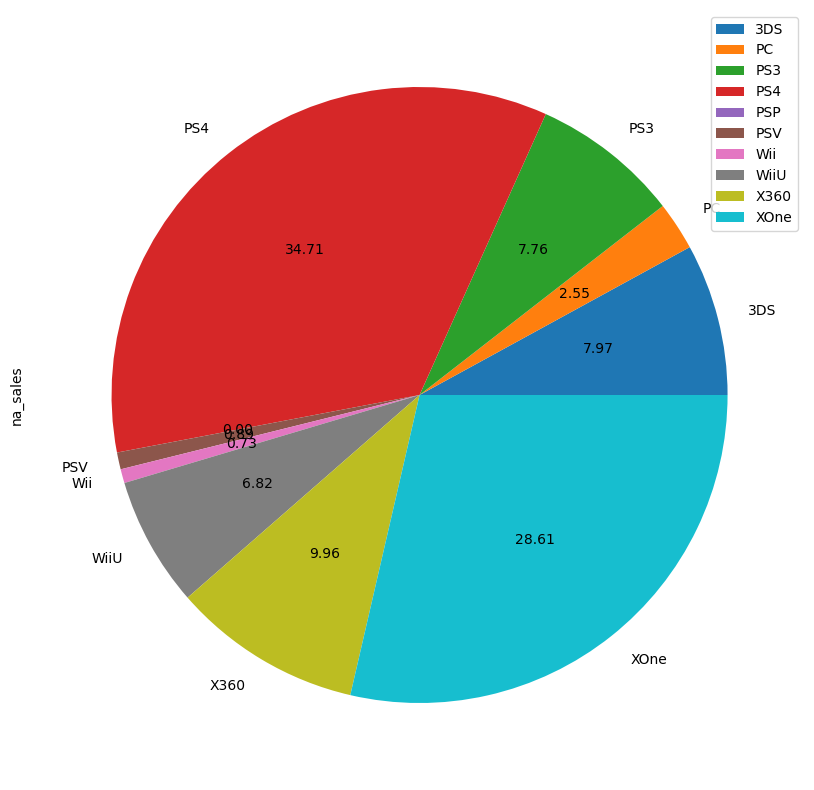

In [55]:
#построим круговую диаграмму распределение игр по жанрам в Северной Америке
(data_sort.groupby(['platform'])
          .sum()
          .plot(kind='pie', 
                y='na_sales', 
                figsize=(10, 10), 
                autopct='%.2f'))
plt.show;

Создадим переменную platform_count - присвоем сумму общих продаж по каждой платформаме в мире;

platform_na - присвоем сумму общих продаж по каждой платформаме в Севаерной Америке.

In [56]:
platform_count = data_sort.groupby(['platform'])['total_sales'].sum()
platform_na = data_sort.groupby('platform')['na_sales'].sum()
percent_na = platform_na / platform_count * 100

print('Доля продаж в Северной Америке:\n', percent_na.sort_values(ascending=False))

Доля продаж в Северной Америке:
 platform
X360    58.689341
XOne    57.901111
WiiU    45.044207
Wii     41.025641
PS4     34.221760
PS3     32.340862
PC      26.728281
3DS     26.119059
PSV     11.250000
PSP      0.000000
dtype: float64


**Вывод**
- Самые популярные платформы  в Северной Америке (топ-5) относительно мировых продаж: 
    - X360   
    - XOne    
    - WiiU 
    - Wii 
    - PS4  
- Однако, как видно из круговой диаграммы, бОльшую популярность в Северной Америке имеет PS4.

Пользователи из Европы.

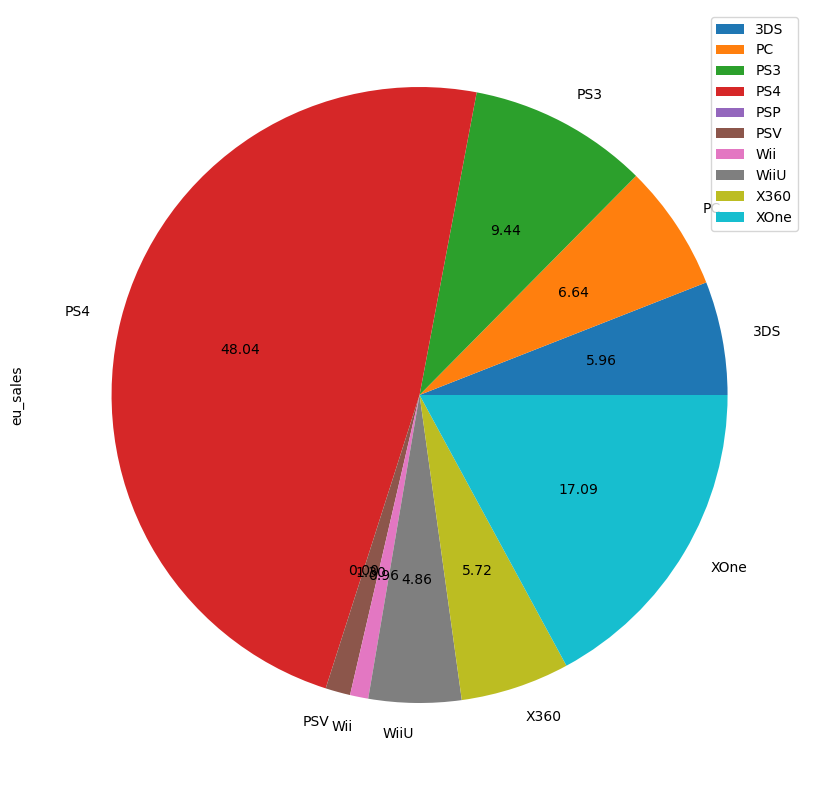

In [57]:
#построим круговую диаграмму распределение игр по жанрам в Европе
(data_sort.groupby(['platform'])
          .sum()
          .plot(kind='pie', 
                y='eu_sales', 
                figsize=(10, 10), 
                autopct='%.2f'))
plt.show;

In [64]:
platform_eu = data_sort.groupby('platform')['eu_sales'].sum()
percent_eu = platform_eu / platform_count * 100

print('Доля продаж в Европе:\n', percent_eu.sort_values(ascending=False))

Доля продаж в Европе:
 platform
PC      66.432532
Wii     51.084813
PS4     45.129273
PS3     37.459666
XOne    32.950983
X360    32.123600
WiiU    30.595626
3DS     18.597139
PSV     15.758929
PSP      0.000000
dtype: float64


**Вывод**
- Самые популярные платформы в Европе (топ-5) относительно мировых продаж: 
    - PC   
    - Wii    
    - PS4 
    - PS3 
    - XOne  
- Однако, как видно из круговой диаграммы, бОльшую популярность в Европе имеет PS4.


Пользователи из Японии.

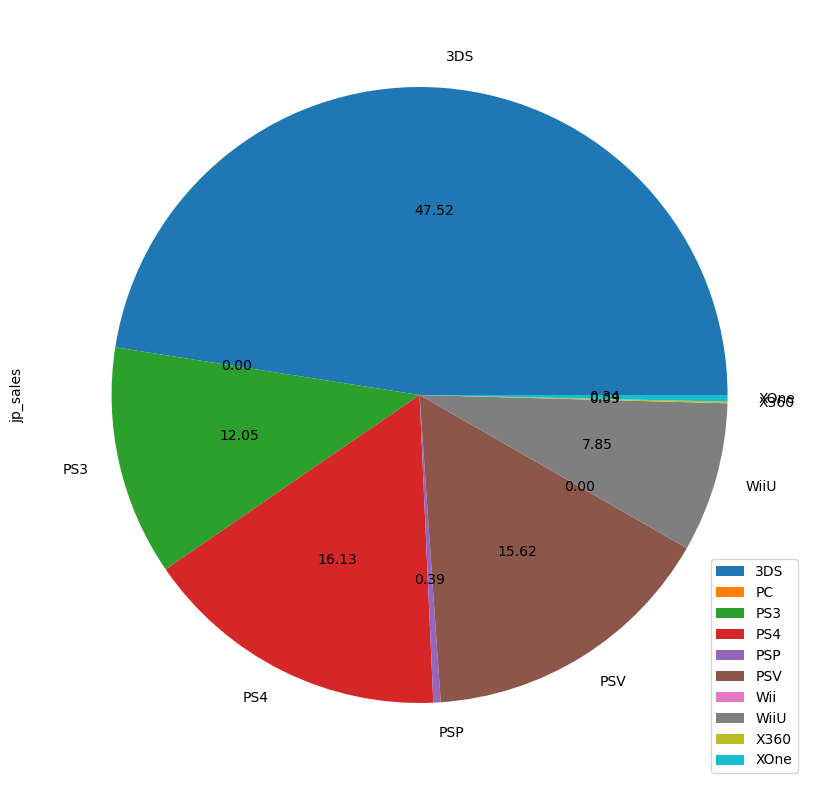

In [59]:
#построим круговую диаграмму распределение игр по жанрам в Японии
(data_sort.groupby(['platform'])
          .sum()
          .plot(kind='pie', 
                y='jp_sales', 
                figsize=(10, 10),
                autopct='%.2f'))
plt.show;

In [60]:
platform_jp = data_sort.groupby('platform')['jp_sales'].sum()
percent_jp = platform_jp / platform_count * 100

print('Доля продаж в Японии:\n', percent_jp.sort_values(ascending=False))

Доля продаж в Японии:
 platform
PSP     100.000000
PSV      64.910714
3DS      51.038302
WiiU     17.007911
PS3      16.456439
PS4       5.212563
XOne      0.227985
X360      0.165906
PC        0.000000
Wii       0.000000
dtype: float64


**Вывод**
- Самые популярные платформы в Японии (топ-5) относительно мировых продаж: 
    - PSP   
    - PSV    
    - 3DS 
    - WiiU 
    - PS3  
- Также стоит обратить внимание, что 100% PSP были проданы в Японии.     
- Однако, как видно из круговой диаграммы, бОльшую популярность в Японии имеет 3DS.

#### Изучим популярность жанров в разных регионах.

Начнем с пользователей в Северной Америке.

Топ-5 жанров в Северной Америке
 genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64


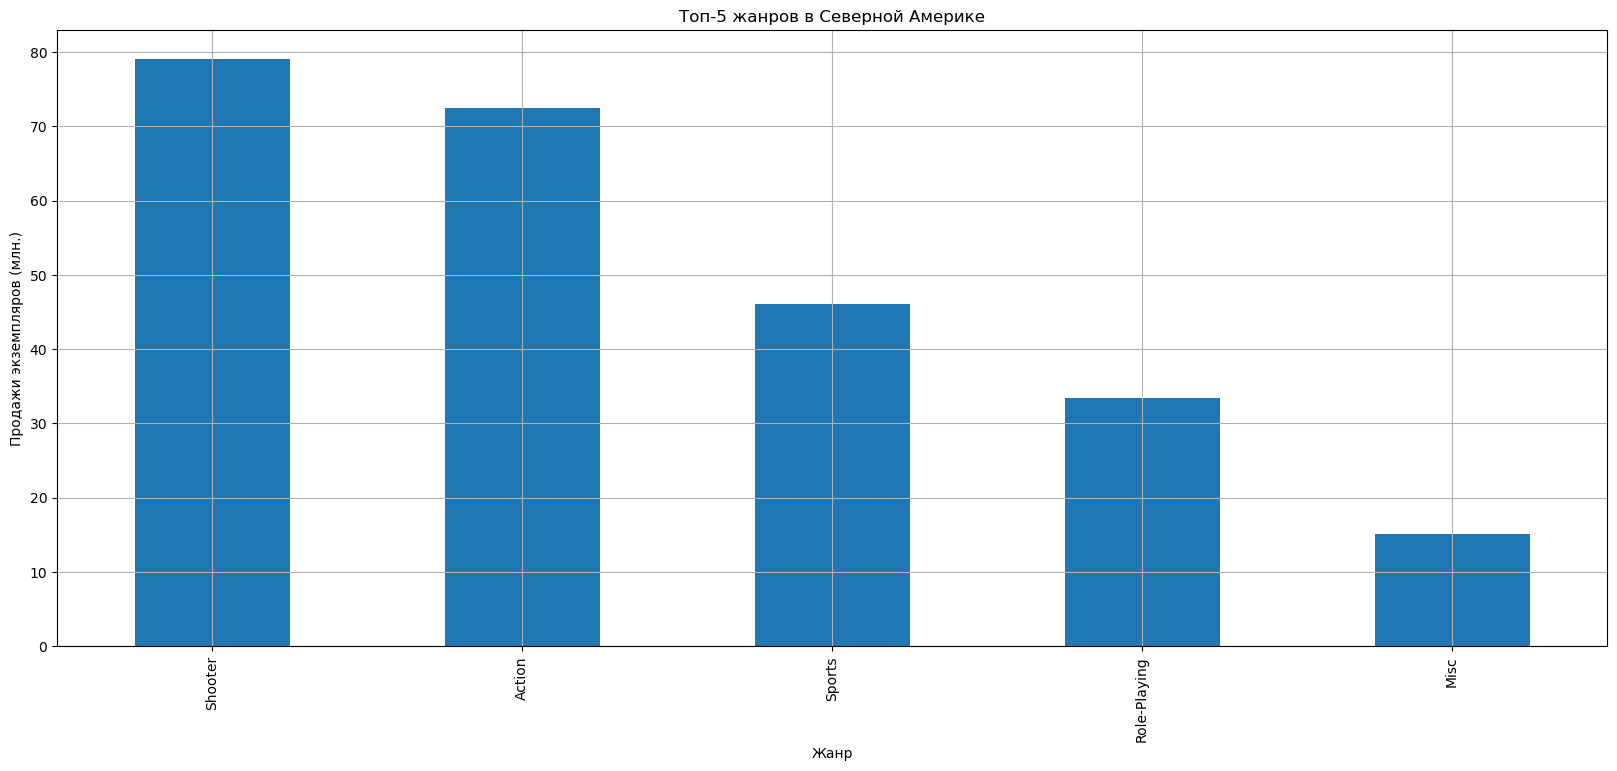

In [61]:
genre_na = data_sort.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print('Топ-5 жанров в Северной Америке\n', genre_na)

genre_na.plot(x = 'genre', 
              y = 'na_sales', 
              kind = 'bar', 
              figsize=(20,8), 
              grid=True, 
              title = 'Топ-5 жанров в Северной Америке')

plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')

plt.show()

**Вывод**

Топ-5 жанров в Северной Америке:
- Shooter         
- Action          
- Sports          
- Role-Playing    
- Misc         

Пользователи из Европы.

Топ-5 жанров в Европе
 genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64


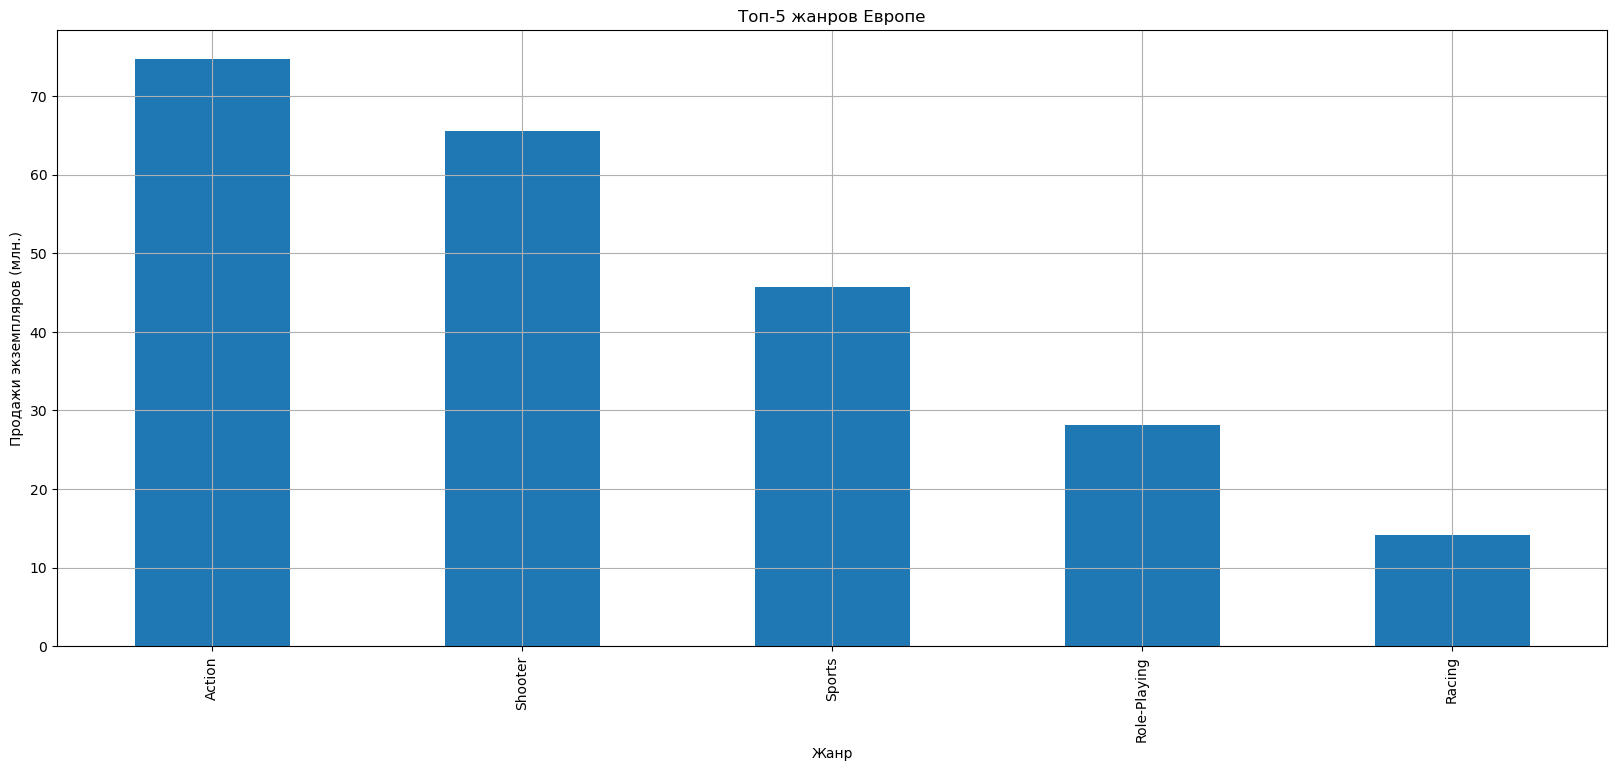

In [62]:
genre_eu = data_sort.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print('Топ-5 жанров в Европе\n', genre_eu)

genre_eu.plot(x = 'genre', 
              y = 'eu_sales', 
              kind = 'bar', 
              figsize=(20,8), 
              grid=True, 
              title = 'Топ-5 жанров Европe')

plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')

plt.show()

**Вывод**

Топ-5 жанров в Европе:
- Action
- Shooter                   
- Sports          
- Role-Playing 
- Racing

Пользователи из Японии.

Топ-5 жанров в Японии
 genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64


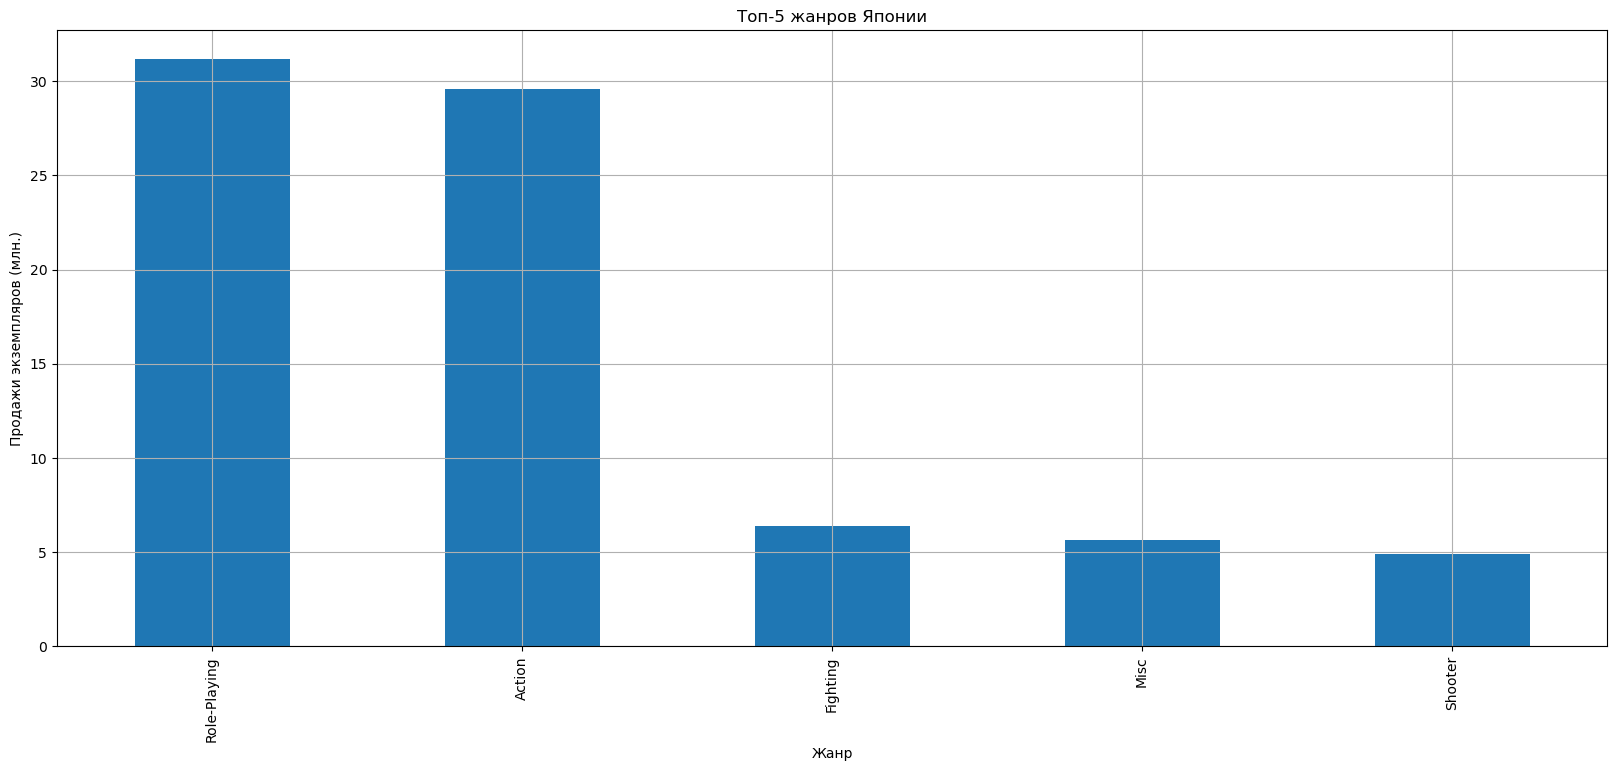

In [63]:
genre_jp = data_sort.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print('Топ-5 жанров в Японии\n', genre_jp)

genre_jp.plot(x = 'genre', 
              y = 'jp_sales', 
              kind = 'bar', 
              figsize=(20,8), 
              grid=True, 
              title = 'Топ-5 жанров Японии')

plt.xlabel('Жанр')
plt.ylabel('Продажи экземпляров (млн.)')

plt.show()

**Вывод**

Топ-5 жанров в Японии:       
- Role-Playing 
- Action 
- Fighting
- Misc
- Shooter         

#### Изучим влияет ли рейтинг ESRB на продажи в отдельном регионе.

Начнем с пользователей в Северной Америке.

rating
M            96.42
no rating    64.72
E            50.74
T            38.95
E10+         33.23
Name: na_sales, dtype: float64


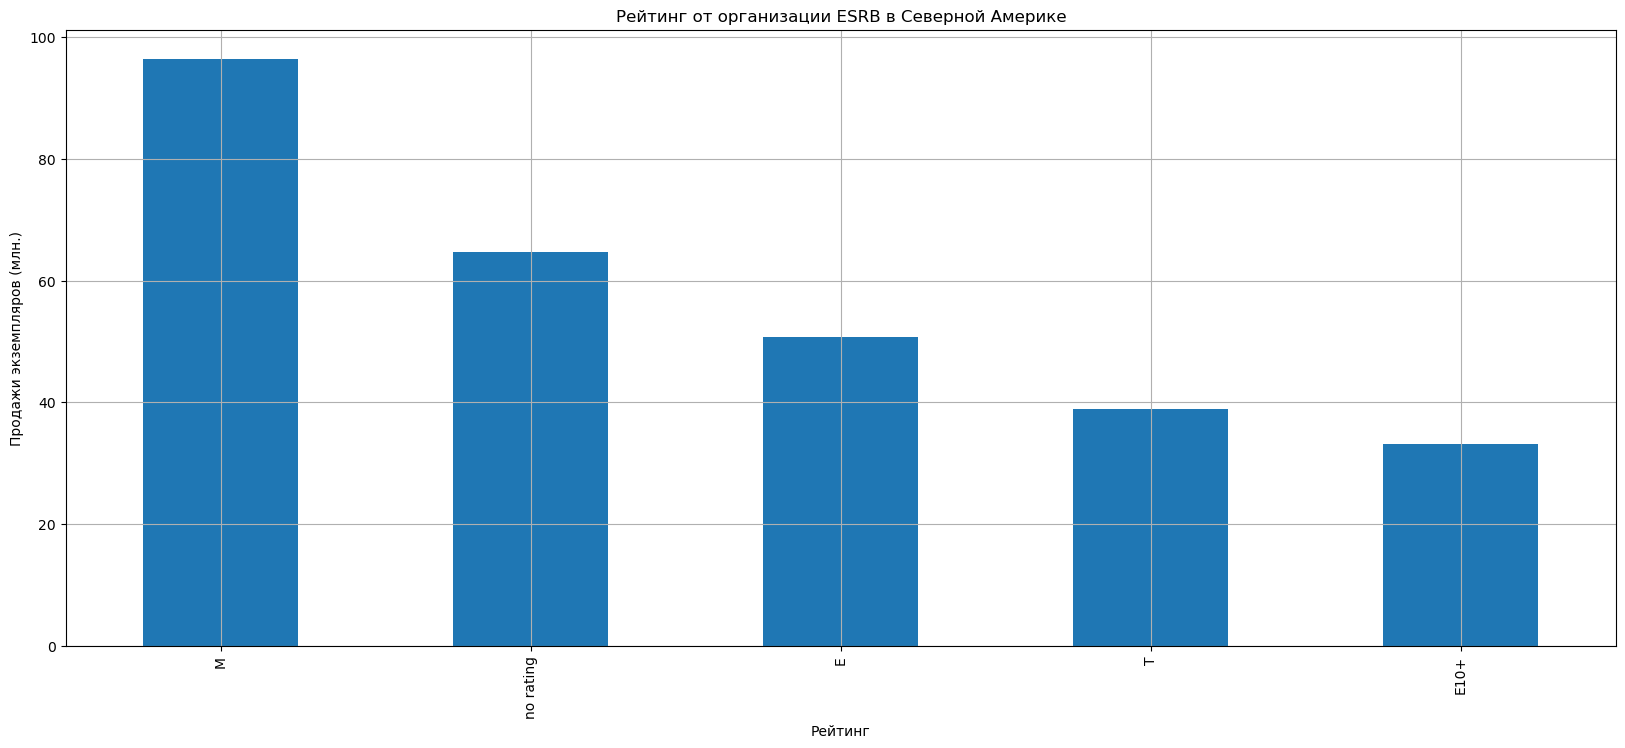

In [64]:
rating_na = data_sort.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print(rating_na)
rating_na.plot(x = 'rating', 
               y = 'na_sales', 
               kind = 'bar', 
               figsize=(20,8), 
               grid=True, 
               title = 'Рейтинг от организации ESRB в Северной Америке')

plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')

plt.show()

**Вывод** 
- В Северной Америке наиболее популярны игры. которые имеют рейтинг ESRB «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. 
- Далее идут игры без рейтинга.

Пользователи из Европы.

rating
M            93.44
no rating    58.95
E            58.06
T            34.07
E10+         26.16
Name: eu_sales, dtype: float64


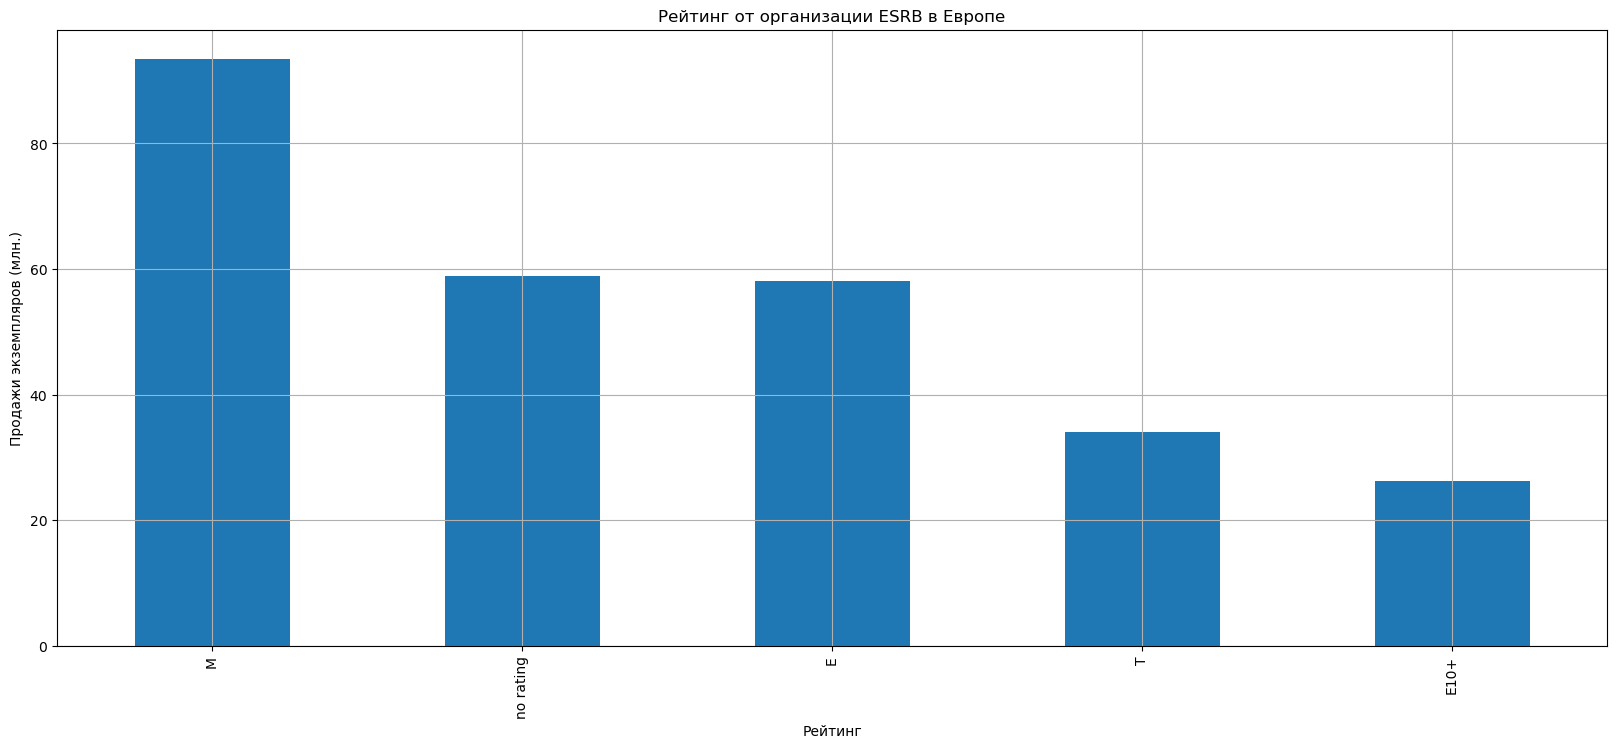

In [65]:
rating_eu = data_sort.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print(rating_eu)
rating_eu.plot(x='ratig',
               y='eu_sales',
               kind='bar',
               figsize=(20,8),
               grid=True,
               title = 'Рейтинг от организации ESRB в Европе')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')

plt.show()

**Вывод** 
- В Европе наиболее популярны игры, которые имеют рейтинг ESRB «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
- Далее идут игры без рейтинга.

Пользлватели из Японии.

rating
no rating    56.90
T            14.78
E             8.94
M             8.01
E10+          4.46
Name: jp_sales, dtype: float64


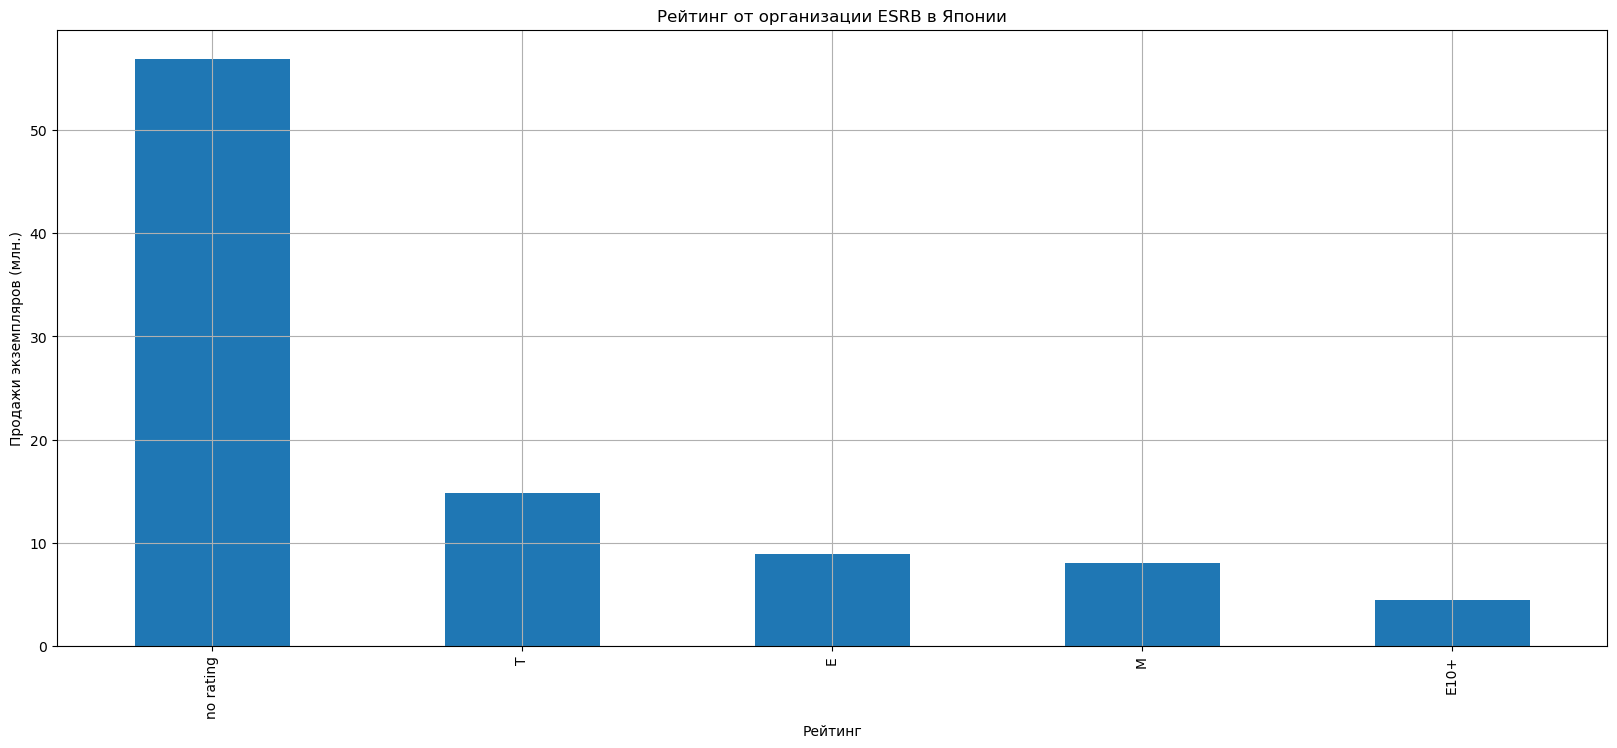

In [66]:
rating_jp = data_sort.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print(rating_jp)
rating_jp.plot(x='rating',
              y='jp_sales',
              kind = 'bar',
              figsize=(20,8),
              grid=True,
              title='Рейтинг от организации ESRB в Японии')
plt.xlabel('Рейтинг')
plt.ylabel('Продажи экземпляров (млн.)')

plt.show()

**Вывод** 

Рейтинг ESRB предназначен для маркировки игр в США и Канады. В данном случае пропуск означает, что игра выпущена не в Северо-Американском регионе.
- Наиболее покупаемые в Японии игры без рейтинга.
- на втором месте по популярности игры с рейтингом ESRB «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. 

### Проверка гипотез


```
H_0: Средние пользовательские рейтинг (user_score) пользователей "PC" = Средние пользовательские рейтинг (user_score) пользователей "XOne"`
H_a: Средние пользовательские рейтинг (user_score) пользователей "PC" ≠ Средние пользовательские рейтинг (user_score) пользователей "XOne"`
alpha = 0.05
```

In [67]:
c = data_sort[data_sort['user_score'] != -1]

a = c[c['platform'] == 'PC']
b = c[c['platform'] == 'XOne']

results_platform = st.ttest_ind(
    a["user_score"],
    c["user_score"],
    equal_var = False)


alpha = .05

#print(results_platform.pvalue)

if results_platform.pvalue < alpha:
    print(results_platform.pvalue, '\nОтвергаем нулевую гипотезу')
else:
    print(results_platform.pvalue, '\nНе получилось отвергнуть нулевую гипотезу')

0.04808080985455764 
Отвергаем нулевую гипотезу


In [68]:
c.groupby('platform')['user_score'].mean().sort_values(ascending = False)

platform
PSV     7.656164
3DS     7.138182
WiiU    7.087500
PS4     6.828099
XOne    6.594545
Wii     6.350000
PC      6.298361
PS3     6.014286
X360    5.771084
Name: user_score, dtype: float64


```
H_0: Средний пользовательский рейтинг (user_score) пользователей жанра "Action" = Средний пользовательский рейтинг (user_score) жанра "Sports" `
H_a: Средний пользовательский рейтинг (user_score) пользователей жанра "Action" ≠ Средний пользовательский рейтинг (user_score) жанра "Sports"`
alpha = 0.05
```

In [69]:
e = c[c['genre'] == 'Action']
d = c[c['genre'] == 'Sports']
results_genre = st.ttest_ind(
e["user_score"],
d["user_score"],
equal_var = False)

alpha = .05
if results_genre.pvalue < alpha:
    print(results_genre.pvalue, '\nОтвергаем нулевую гипотезу')
else:
    print(results_genre.pvalue, '\nНе получилось отвергнуть нулевую гипотезу')

1.1825550382644557e-14 
Отвергаем нулевую гипотезу


In [70]:
data_sort.groupby('genre')['user_score'].mean().sort_values(ascending = False)

genre
Shooter         5.369531
Platform        4.907895
Racing          4.415942
Fighting        3.923333
Sports          3.910559
Simulation      3.093182
Strategy        2.997297
Role-Playing    2.966516
Action          2.723586
Misc            1.891150
Puzzle          1.564286
Adventure       1.151892
Name: user_score, dtype: float64


- Нулевая гипотеза – это основное проверяемое предположение, которое обычно формулируется как отсутствие различий.
- Альтернативной гипотезой в данном случае следует выбрать предположение обратное первому.


- Для тестирования гипотез использован двусторонний t-тест.
- В Python для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используется метод scipy.stats.ttest_ind.

**Вывод**
- По имеющимся данным, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) платформ PC и XOne в пользу альтернативной гипотезы
- По имеющимся данным, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы


### Общий вывод

Прогноз на 2017 год.
- Для построения прогноза на 2017 г. был проаналирован период 2014 - 2016 г.;
- PS4 имеет большую популярность в Европе и Северной Америке, а в Японии популярна платформа 3DS;
- В Северной Америке, Японии и Европе схожие ТОП-5 популярных жаноров;
- Рейтинг ESRB предназначен для маркировки игр в США и Канады. Самой популярной категорий в рейтинге от организации ESRB в Северной Америке и Европе можно твердо считать категорию M («Для взрослых»: Материалы игры не подходят для подростков младше 17 лет), в Японии это четвертая по популярности категория, но у Японии есть свой рейтинг, но по ним у нас нет данных. 

Исходя из всех исследований, можно погнозировать, что в 2017 году:
- будет популярна PS4;
- самый популярный жанры будут "Shooter" и "Action";
- основным регионом для рекламы стоит считать Европу;
- нанаиболее популярны игры с рейтингом ESRB «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет;
- можно сказать, что зависимости между оценками критиков/пользователей и продажами - нет.

В конце проекта были проверенны 2 гипотезы: 
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

Обе гипотезы НЕ были подтверждены.